# CALIDAD DE DATOS Y CREACION DATAMART ANALITICO

## Importacion de paquetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%config IPCompleter.greedy = True

#Formato de display
pd.options.display.float_format = '{:15.2f}'.format

#Formato de graficos
sns.set_style('darkgrid')

## Carga de datos

Este caso se compone de 4 datasets:

* Planta 1, datos de generación
* Planta 1, datos de sensor ambiental
* Planta 2, datos de generación
* Planta 2, datos de sensor ambiental

In [2]:
#datos de generacion de la planta 1
p1g = pd.read_csv('../Datos/Plant_1_Generation_Data.csv')
p1g

DATE_TIME  PLANT_ID       SOURCE_KEY        DC_POWER  \
0      15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7            0.00   
1      15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y            0.00   
2      15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD            0.00   
3      15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4            0.00   
4      15-05-2020 00:00   4135001  McdE0feGgRqW7Ca            0.00   
...                 ...       ...              ...             ...   
68773  17-06-2020 23:45   4135001  uHbuxQJl8lW7ozc            0.00   
68774  17-06-2020 23:45   4135001  wCURE6d3bPkepu2            0.00   
68775  17-06-2020 23:45   4135001  z9Y9gH1T5YWrNuG            0.00   
68776  17-06-2020 23:45   4135001  zBIq5rxdHJRwDNY            0.00   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof            0.00   

             AC_POWER     DAILY_YIELD     TOTAL_YIELD  
0                0.00            0.00      6259559.00  
1                0.00            0.00      6183645.00  
2                0.00            0.00      6987759.00  
3                0.00            0.00      7602960.00  
4                0.00            0.00      7158964.00  
...               ...             ...             ...  
68773            0.00         5967.00      7287002.00  
68774            0.00         5147.62      7028601.00  
68775            0.00         5819.00      7251204.00  
68776            0.00         5817.00      6583369.00  
68777            0.00         5910.00      7363272.00  

[68778 rows x 7 columns]

In [3]:
#datos de sensor ambiental de la planta 1
p1w = pd.read_csv('../Datos/Plant_1_Weather_Sensor_Data.csv')
p1w

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0     2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe                25.18   
1     2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe                25.08   
2     2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe                24.94   
3     2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe                24.85   
4     2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe                24.62   
...                   ...       ...              ...                  ...   
3177  2020-06-17 22:45:00   4135001  HmiyD2TTLFNqkNe                22.15   
3178  2020-06-17 23:00:00   4135001  HmiyD2TTLFNqkNe                22.13   
3179  2020-06-17 23:15:00   4135001  HmiyD2TTLFNqkNe                22.01   
3180  2020-06-17 23:30:00   4135001  HmiyD2TTLFNqkNe                21.97   
3181  2020-06-17 23:45:00   4135001  HmiyD2TTLFNqkNe                21.91   

      MODULE_TEMPERATURE     IRRADIATION  
0                  22.86            0.00  
1                  22.76            0.00  
2                  22.59            0.00  
3                  22.36            0.00  
4                  22.17            0.00  
...                  ...             ...  
3177               21.48            0.00  
3178               21.39            0.00  
3179               20.71            0.00  
3180               20.73            0.00  
3181               20.43            0.00  

[3182 rows x 6 columns]

In [4]:
#datos de generacion de la planta 2
p2g = pd.read_csv('../Datos/Plant_2_Generation_Data.csv')
p2g

DATE_TIME  PLANT_ID       SOURCE_KEY        DC_POWER  \
0      2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml            0.00   
1      2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL            0.00   
2      2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR            0.00   
3      2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4            0.00   
4      2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q            0.00   
...                    ...       ...              ...             ...   
67693  2020-06-17 23:45:00   4136001  q49J1IKaHRwDQnt            0.00   
67694  2020-06-17 23:45:00   4136001  rrq4fwE8jgrTyWY            0.00   
67695  2020-06-17 23:45:00   4136001  vOuJvMaM2sgwLmb            0.00   
67696  2020-06-17 23:45:00   4136001  xMbIugepa2P7lBB            0.00   
67697  2020-06-17 23:45:00   4136001  xoJJ8DcxJEcupym            0.00   

             AC_POWER     DAILY_YIELD     TOTAL_YIELD  
0                0.00         9425.00      2429011.00  
1                0.00            0.00   1215278736.00  
2                0.00         3075.33   2247719577.00  
3                0.00          269.93      1704250.00  
4                0.00         3177.00     19941526.00  
...               ...             ...             ...  
67693            0.00         4157.00       520758.00  
67694            0.00         3931.00    121131356.00  
67695            0.00         4322.00      2427691.00  
67696            0.00         4218.00    106896394.00  
67697            0.00         4316.00    209335741.00  

[67698 rows x 7 columns]

In [5]:
#datos de sensor ambiental de la planta 2
p2w = pd.read_csv('../Datos/Plant_2_Weather_Sensor_Data.csv')
p2w

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0     2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0                27.00   
1     2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0                26.88   
2     2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0                26.68   
3     2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0                26.50   
4     2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0                26.60   
...                   ...       ...              ...                  ...   
3254  2020-06-17 22:45:00   4136001  iq8k7ZNt4Mwm3w0                23.51   
3255  2020-06-17 23:00:00   4136001  iq8k7ZNt4Mwm3w0                23.48   
3256  2020-06-17 23:15:00   4136001  iq8k7ZNt4Mwm3w0                23.35   
3257  2020-06-17 23:30:00   4136001  iq8k7ZNt4Mwm3w0                23.29   
3258  2020-06-17 23:45:00   4136001  iq8k7ZNt4Mwm3w0                23.20   

      MODULE_TEMPERATURE     IRRADIATION  
0                  25.06            0.00  
1                  24.42            0.00  
2                  24.43            0.00  
3                  24.42            0.00  
4                  25.09            0.00  
...                  ...             ...  
3254               22.86            0.00  
3255               22.74            0.00  
3256               22.49            0.00  
3257               22.37            0.00  
3258               22.54            0.00  

[3259 rows x 6 columns]

## CALIDAD DE DATOS

### Planta 1 - datos de generación

In [6]:
p1g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


- No hay nulos.
- DATE_TIME está como object.

In [7]:
p1g['DATE_TIME'] = pd.to_datetime(p1g.DATE_TIME,dayfirst=True)

In [8]:
# compruebo que PLANT_ID es unico
p1g.PLANT_ID.drop_duplicates()

0    4135001
Name: PLANT_ID, dtype: int64

In [9]:
# lo llevo a un id mas mnemotecnico
p1g['PLANT_ID'] = p1g.PLANT_ID.replace(4135001, 'p1')

In [10]:
p1g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  object        
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 3.7+ MB


In [11]:
# analisis estadistico de las variables numericas
pd.options.display.float_format = '{:15.2f}'.format  # quita notacion centifica
p1g.describe().T

count            mean             std             min  \
DC_POWER           68778.00         3147.43         4036.46            0.00   
AC_POWER           68778.00          307.80          394.40            0.00   
DAILY_YIELD        68778.00         3295.97         3145.18            0.00   
TOTAL_YIELD        68778.00      6978711.76       416271.98      6183645.00   

                        25%             50%             75%             max  
DC_POWER               0.00          429.00         6366.96        14471.12  
AC_POWER               0.00           41.49          623.62         1410.95  
DAILY_YIELD            0.00         2658.71         6274.00         9163.00  
TOTAL_YIELD      6512002.54      7146685.00      7268705.91      7846821.00

Vemos que hay mucha diferencia entre AC_POWER y AC_POWER

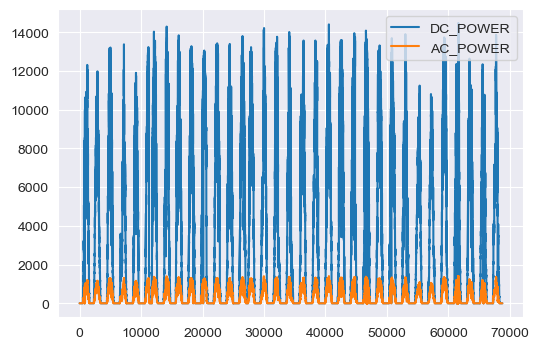

In [12]:
p1g[['DC_POWER','AC_POWER']].plot(figsize = (6,4));

La diferencia es muy grande.

Primero vamos a comprobar si esa diferencia se mantiene siempre (con una correlación), y después vamos a comprobar cual es el ratio medio entre ambas medidas.

In [13]:
p1g.DC_POWER.corr(p1g.AC_POWER)

0.9999962553331404

Vemos que estan muy correlacionadas

In [14]:
(p1g.DC_POWER/p1g.AC_POWER).describe()

count          36827.00
mean              10.23
std                0.05
min                9.38
25%               10.20
50%               10.22
75%               10.25
max               10.47
dtype: float64

Vemos que en toda la muestra practicamente se mantiene constante la relacion de 10.

Parece que los Inverters están transformando solo el 10% de DC a AC, lo cual a priori es muy bajo.

Analizamos ahora la variable categórica, que es el identificador de los inverters.

In [15]:
# veo cuatos id unicos hay, o lo que es lo mismo, cuantos inverters hay
p1g.SOURCE_KEY.nunique()

22

In [16]:
p1g.SOURCE_KEY.value_counts()

bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
z9Y9gH1T5YWrNuG    3126
wCURE6d3bPkepu2    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: SOURCE_KEY, dtype: int64

Conclusiones:

- La planta 1 tiene 22 inverters
- Todos tienen un número similar de medidas aunque no exactamente igual
- Podrían ser paradas por mantenimiento, o simples pérdidas de datos pero lo apuntamos para la fase de análisis

Vamos a analizar las variables DAILY_YIELD, ya que los metadatos nos dicen que la variable TOTAL_YIELD es el total acumulado **por inverter**, pero en DAILY_YIELD no lo especifica, por lo que no sabemos si es un acumulado por inverter o por planta.

La hipótesis es la siguiente: si es por planta no debería haber diferencias entre el dato de los diferentes inverters en el mismo momento puntual.

Y por consiguiente si vemos que sí hay diferencias, entonces es que el dato es por inverter.

Para comprobarlo tomamos una muestra de los 5 primeros inverters.

In [17]:
seleccion = list(p1g.SOURCE_KEY.unique()[:5])
temp = p1g[p1g.SOURCE_KEY.isin(seleccion)].set_index('DATE_TIME') # ya establezco la fecha como indice
temp

PLANT_ID       SOURCE_KEY        DC_POWER        AC_POWER  \
DATE_TIME                                                                       
2020-05-15 00:00:00       p1  1BY6WEcLGh8j5v7            0.00            0.00   
2020-05-15 00:00:00       p1  1IF53ai7Xc0U56Y            0.00            0.00   
2020-05-15 00:00:00       p1  3PZuoBAID5Wc2HD            0.00            0.00   
2020-05-15 00:00:00       p1  7JYdWkrLSPkdwr4            0.00            0.00   
2020-05-15 00:00:00       p1  McdE0feGgRqW7Ca            0.00            0.00   
...                      ...              ...             ...             ...   
2020-06-17 23:45:00       p1  1BY6WEcLGh8j5v7            0.00            0.00   
2020-06-17 23:45:00       p1  1IF53ai7Xc0U56Y            0.00            0.00   
2020-06-17 23:45:00       p1  3PZuoBAID5Wc2HD            0.00            0.00   
2020-06-17 23:45:00       p1  7JYdWkrLSPkdwr4            0.00            0.00   
2020-06-17 23:45:00       p1  McdE0feGgRqW7Ca            0.00            0.00   

                        DAILY_YIELD     TOTAL_YIELD  
DATE_TIME                                            
2020-05-15 00:00:00            0.00      6259559.00  
2020-05-15 00:00:00            0.00      6183645.00  
2020-05-15 00:00:00            0.00      6987759.00  
2020-05-15 00:00:00            0.00      7602960.00  
2020-05-15 00:00:00            0.00      7158964.00  
...                             ...             ...  
2020-06-17 23:45:00         5521.00      6485319.00  
2020-06-17 23:45:00         6034.00      6433566.00  
2020-06-17 23:45:00         6052.00      7237425.00  
2020-06-17 23:45:00         5856.00      7846821.00  
2020-06-17 23:45:00         5992.00      7408587.00  

[15648 rows x 6 columns]

Pinta todo como que es por inverter ya que para la misma fecha tenemos valores diferentes segun el inverter.

Pero ahora vamos a limitar el periodo de tiempo a los primeros 5 dias de junio

In [18]:
temp = temp['2020-06-01':'2020-06-05']  # recordar que ahora la fecha es index
temp

PLANT_ID       SOURCE_KEY        DC_POWER        AC_POWER  \
DATE_TIME                                                                       
2020-06-01 00:00:00       p1  1BY6WEcLGh8j5v7            0.00            0.00   
2020-06-01 00:00:00       p1  1IF53ai7Xc0U56Y            0.00            0.00   
2020-06-01 00:00:00       p1  3PZuoBAID5Wc2HD            0.00            0.00   
2020-06-01 00:00:00       p1  7JYdWkrLSPkdwr4            0.00            0.00   
2020-06-01 00:00:00       p1  McdE0feGgRqW7Ca            0.00            0.00   
...                      ...              ...             ...             ...   
2020-06-05 23:45:00       p1  1BY6WEcLGh8j5v7            0.00            0.00   
2020-06-05 23:45:00       p1  1IF53ai7Xc0U56Y            0.00            0.00   
2020-06-05 23:45:00       p1  3PZuoBAID5Wc2HD            0.00            0.00   
2020-06-05 23:45:00       p1  7JYdWkrLSPkdwr4            0.00            0.00   
2020-06-05 23:45:00       p1  McdE0feGgRqW7Ca            0.00            0.00   

                        DAILY_YIELD     TOTAL_YIELD  
DATE_TIME                                            
2020-06-01 00:00:00          829.00      6377931.00  
2020-06-01 00:00:00            0.00      6311432.00  
2020-06-01 00:00:00            0.00      7115304.00  
2020-06-01 00:00:00          730.38      7727821.00  
2020-06-01 00:00:00            0.00      7286760.00  
...                             ...             ...  
2020-06-05 23:45:00         7162.00      6412542.00  
2020-06-05 23:45:00            0.00      6348557.00  
2020-06-05 23:45:00            0.00      7152486.00  
2020-06-05 23:45:00            0.00      7764140.00  
2020-06-05 23:45:00         4950.00      7324681.00  

[2370 rows x 6 columns]

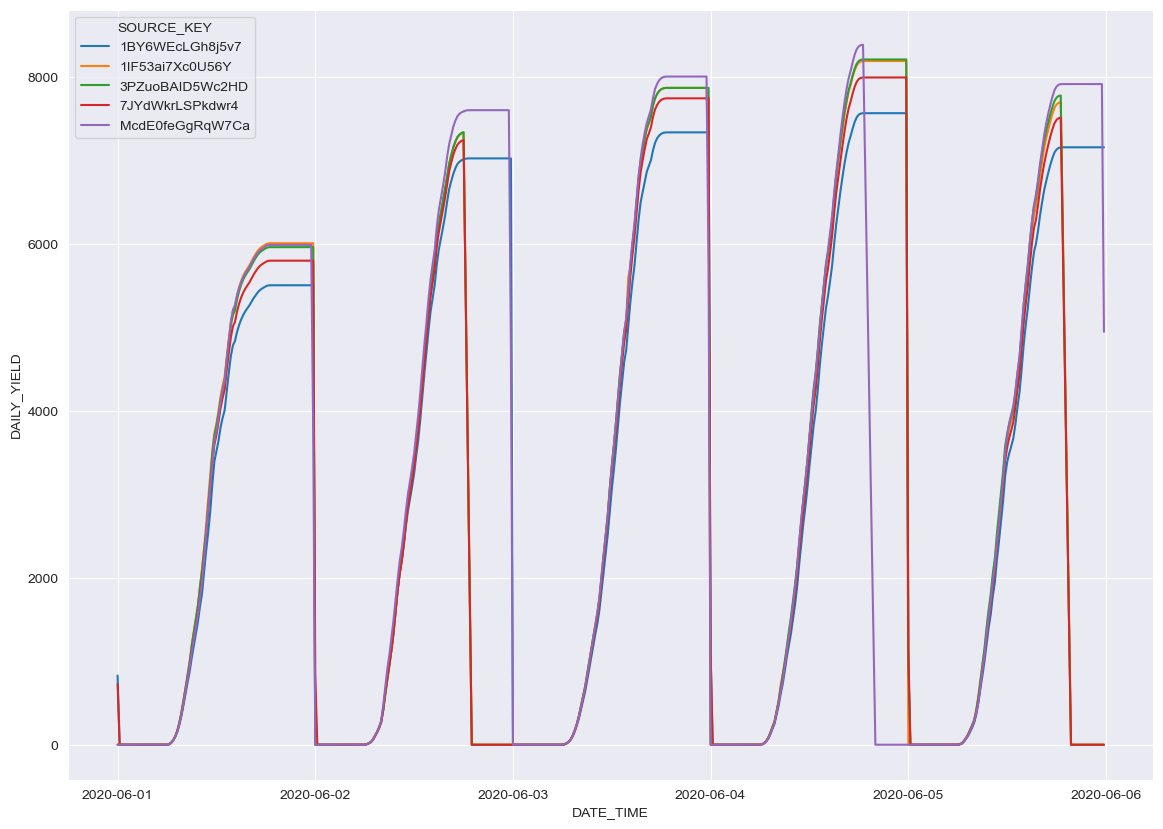

In [19]:
plt.figure(figsize = (14,10))
sns.lineplot(data = temp, x = temp.index, y = 'DAILY_YIELD', hue = 'SOURCE_KEY'); 

Se ve claramente el comportamiento diferente de la variable por inverter, por tanto el dato es por inverter al igual que TOTAL_YIELD

Ahora voy a ver si la serie temporal es regular, es decir que existan muestras cada 15 minutos en todos los días.

Para eso voy a graficar el conteo de datos por día par todos los inverters.

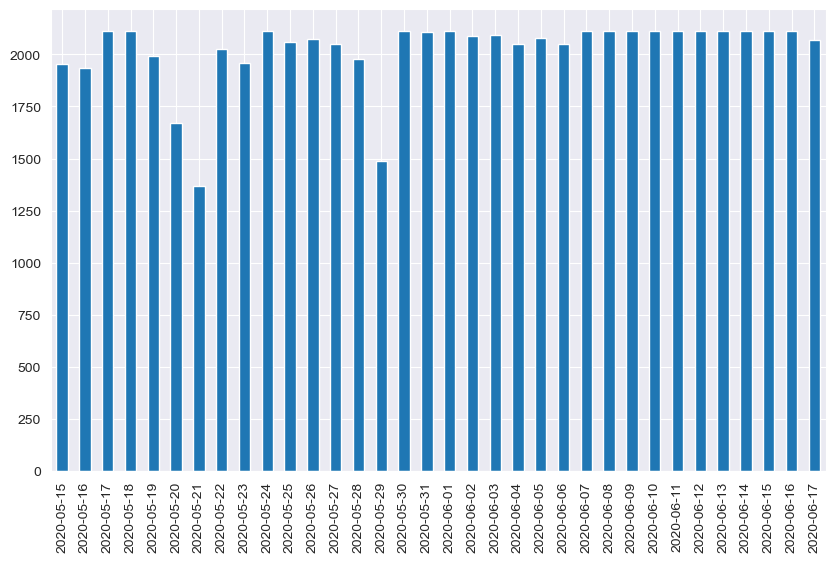

In [20]:
# con el accesor dt accedo a la parte de día de la fecha
p1g.DATE_TIME.dt.date.value_counts().sort_index().plot.bar(figsize = (10,6));

Vemos que hay días en los que faltan muestras. Por eso en nuestro dataset no había nulos

Conclusiones:

- El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
- Tenemos datos para todos los días, no falta ninguno intermedio
- Pero algunos días como el 21/05 o el 29/05 tienen menos mediciones

### Planta 1 - datos de sensor ambiental

In [21]:
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [22]:
# convierto el DATE_TIME a fecha
p1w['DATE_TIME'] = pd.to_datetime(p1w.DATE_TIME)

In [23]:
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


In [24]:
p1w.PLANT_ID.unique()

array([4135001], dtype=int64)

In [25]:
# convierto el id de planta a p1
p1w['PLANT_ID'] = p1w.PLANT_ID.replace(4135001, 'p1')

EDA de variables numericas

In [26]:
p1w.describe().T

count            mean             std  \
AMBIENT_TEMPERATURE         3182.00           25.53            3.35   
MODULE_TEMPERATURE          3182.00           31.09           12.26   
IRRADIATION                 3182.00            0.23            0.30   

                                min             25%             50%  \
AMBIENT_TEMPERATURE           20.40           22.71           24.61   
MODULE_TEMPERATURE            18.14           21.09           24.62   
IRRADIATION                    0.00            0.00            0.02   

                                75%             max  
AMBIENT_TEMPERATURE           27.92           35.25  
MODULE_TEMPERATURE            41.31           65.55  
IRRADIATION                    0.45            1.22

Revisamos la variable categórica, que es el identificador del sensor.

In [27]:
p1w.SOURCE_KEY.drop_duplicates()

0    HmiyD2TTLFNqkNe
Name: SOURCE_KEY, dtype: object

Existe un unico sensor

Veremos si la serie temporal es regular

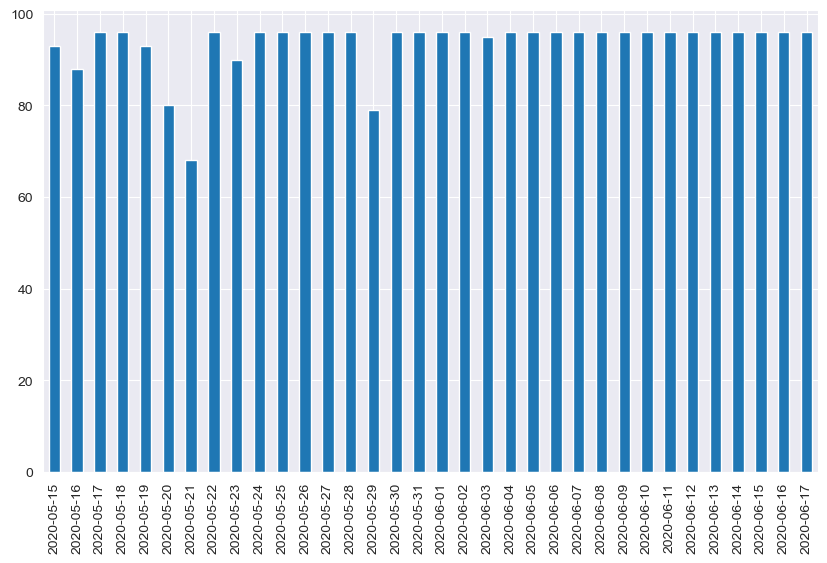

In [28]:
# veo las muestras por dia. como son cada 15 minutos, si estan todas son 96 muestras por dia
p1w.DATE_TIME.dt.date.value_counts().sort_index().plot.bar(figsize = (10,6));

Conclusiones:

- El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
- Tenemos datos para todos los días, no falta ninguno intermedio
- Pero algunos días como el 21/05 o el 29/05 tienen menos mediciones
- No es 100% regular

### Planta 2 - datos de generación

In [29]:
p2g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [30]:
# convierto DATE_TIME a fecha
p2g['DATE_TIME'] = pd.to_datetime(p2g.DATE_TIME)

# sustituyo el id de planta por p2
p2g['PLANT_ID'] = p2g.PLANT_ID.replace(4136001, 'p2')

In [31]:
# EDA variables numericas
p2g.describe().T

count            mean             std             min  \
DC_POWER           67698.00          246.70          370.57            0.00   
AC_POWER           67698.00          241.28          362.11            0.00   
DAILY_YIELD        67698.00         3294.89         2919.45            0.00   
TOTAL_YIELD        67698.00    658944788.42    729667771.07            0.00   

                        25%             50%             75%             max  
DC_POWER               0.00            0.00          446.59         1420.93  
AC_POWER               0.00            0.00          438.22         1385.42  
DAILY_YIELD          272.75         2911.00         5534.00         9873.00  
TOTAL_YIELD     19964944.87    282627587.00   1348495113.00   2247916295.00

In [32]:
(p2g.DC_POWER / p2g.AC_POWER).describe()

count          32036.00
mean               1.02
std                0.01
min                0.99
25%                1.02
50%                1.02
75%                1.03
max                1.10
dtype: float64

A diferencia de la generacion en la planta 1, en la planta 2 los valores de potencia AC y potencia DC estan muy proximos

In [33]:
# veo cuantos inverters hay en la planta 2
p2g.SOURCE_KEY.nunique()

22

Analizo ahora si la serie temporal es regular. Si asi lo fuera, para cada dia tendria que haber 4x24x22 = 2122 muestras 

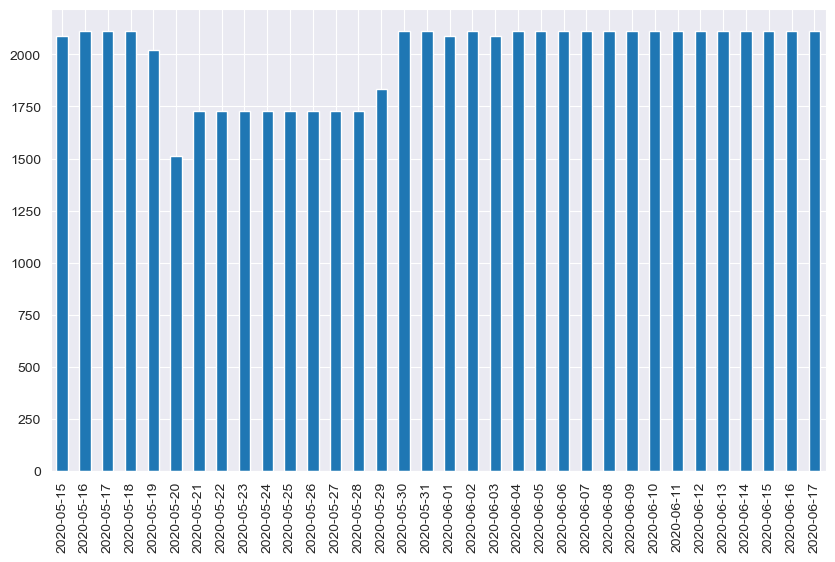

In [34]:
p2g.DATE_TIME.dt.date.value_counts().sort_index().plot.bar(figsize = (10,6));

Conclusiones:

- El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
- Tenemos datos para todos los días, no falta ninguno intermedio
- Pero algunos días como el 20/05 y varios más tienen menos mediciones
- No es 100% regular

### Planta 2 - datos de sensor ambiental

In [35]:
p2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [36]:
# convierto el DATE_TIME a fecha
p2w['DATE_TIME'] = pd.to_datetime(p2w.DATE_TIME)
p2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 152.9+ KB


In [37]:
p2w.PLANT_ID.unique()

array([4136001], dtype=int64)

In [38]:
# convierto el id de planta a p2
p2w['PLANT_ID'] = p2w.PLANT_ID.replace(4136001, 'p2')

EDA de variables numericas

In [39]:
p2w.describe().T

count            mean             std  \
AMBIENT_TEMPERATURE         3259.00           28.07            4.06   
MODULE_TEMPERATURE          3259.00           32.77           11.34   
IRRADIATION                 3259.00            0.23            0.31   

                                min             25%             50%  \
AMBIENT_TEMPERATURE           20.94           24.60           26.98   
MODULE_TEMPERATURE            20.27           23.72           27.53   
IRRADIATION                    0.00            0.00            0.02   

                                75%             max  
AMBIENT_TEMPERATURE           31.06           39.18  
MODULE_TEMPERATURE            40.48           66.64  
IRRADIATION                    0.44            1.10

In [40]:
p1w.describe().T

count            mean             std  \
AMBIENT_TEMPERATURE         3182.00           25.53            3.35   
MODULE_TEMPERATURE          3182.00           31.09           12.26   
IRRADIATION                 3182.00            0.23            0.30   

                                min             25%             50%  \
AMBIENT_TEMPERATURE           20.40           22.71           24.61   
MODULE_TEMPERATURE            18.14           21.09           24.62   
IRRADIATION                    0.00            0.00            0.02   

                                75%             max  
AMBIENT_TEMPERATURE           27.92           35.25  
MODULE_TEMPERATURE            41.31           65.55  
IRRADIATION                    0.45            1.22

La temperatura ambiente es un poco mayor que en la planta 1, mientras que la temp del modulo y la irradiacion, son similares

Revisamos la variable categórica, que es el identificador del sensor.

In [41]:
p2w.SOURCE_KEY.drop_duplicates()

0    iq8k7ZNt4Mwm3w0
Name: SOURCE_KEY, dtype: object

Existe un unico sensor

Veremos si la serie temporal es regular

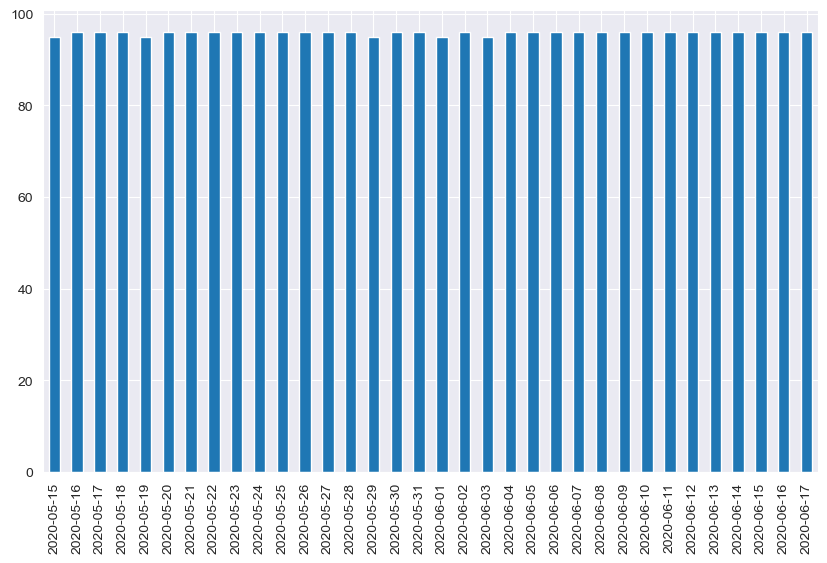

In [42]:
# veo las muestras por dia. como son cada 15 minutos, si estan todas son 96 muestras por dia
p2w.DATE_TIME.dt.date.value_counts().sort_index().plot.bar(figsize = (10,6));

Conclusiones:

- El período de datos es entre el 15 de Mayo del 2020 y el 17 de Junio de 2020
- Tenemos datos para todos los días, no falta ninguno intermedio
- Pero algunos días como el 21/05 o el 29/05 tienen menos mediciones
- No es 100% regular aunque es mas que el resto
- La temperatura ambiente es unos 3 grados superior que en la planta 1

## CREACIÓN DEL DATAMART ANALITICO

Vamos a hacer una unión por partes.

Primero los dos datasets de generación. Que será una apilación de registros ya que los campos son iguales.

Después los dos de medidas ambientales. Que será una apilación de registros ya que los campos son iguales.

Y por último cruzaremos ambos parciales mediante la integración por campos clave.

### Unión de los datasets de generación

In [43]:
# axis = index porque estoy apilando filas
gener = pd.concat([p1g, p2g], axis = 'index')
gener.head()

DATE_TIME PLANT_ID       SOURCE_KEY        DC_POWER        AC_POWER  \
0 2020-05-15       p1  1BY6WEcLGh8j5v7            0.00            0.00   
1 2020-05-15       p1  1IF53ai7Xc0U56Y            0.00            0.00   
2 2020-05-15       p1  3PZuoBAID5Wc2HD            0.00            0.00   
3 2020-05-15       p1  7JYdWkrLSPkdwr4            0.00            0.00   
4 2020-05-15       p1  McdE0feGgRqW7Ca            0.00            0.00   

      DAILY_YIELD     TOTAL_YIELD  
0            0.00      6259559.00  
1            0.00      6183645.00  
2            0.00      6987759.00  
3            0.00      7602960.00  
4            0.00      7158964.00

Renombro los nombres de las variables

In [44]:
gener.columns = ['fecha', 'planta', 'inverter_id', 'kw_dc', 'kw_ac', 'kw_dia', 'kw_total']
gener

fecha planta      inverter_id           kw_dc  \
0     2020-05-15 00:00:00     p1  1BY6WEcLGh8j5v7            0.00   
1     2020-05-15 00:00:00     p1  1IF53ai7Xc0U56Y            0.00   
2     2020-05-15 00:00:00     p1  3PZuoBAID5Wc2HD            0.00   
3     2020-05-15 00:00:00     p1  7JYdWkrLSPkdwr4            0.00   
4     2020-05-15 00:00:00     p1  McdE0feGgRqW7Ca            0.00   
...                   ...    ...              ...             ...   
67693 2020-06-17 23:45:00     p2  q49J1IKaHRwDQnt            0.00   
67694 2020-06-17 23:45:00     p2  rrq4fwE8jgrTyWY            0.00   
67695 2020-06-17 23:45:00     p2  vOuJvMaM2sgwLmb            0.00   
67696 2020-06-17 23:45:00     p2  xMbIugepa2P7lBB            0.00   
67697 2020-06-17 23:45:00     p2  xoJJ8DcxJEcupym            0.00   

                kw_ac          kw_dia        kw_total  
0                0.00            0.00      6259559.00  
1                0.00            0.00      6183645.00  
2                0.00            0.00      6987759.00  
3                0.00            0.00      7602960.00  
4                0.00            0.00      7158964.00  
...               ...             ...             ...  
67693            0.00         4157.00       520758.00  
67694            0.00         3931.00    121131356.00  
67695            0.00         4322.00      2427691.00  
67696            0.00         4218.00    106896394.00  
67697            0.00         4316.00    209335741.00  

[136476 rows x 7 columns]

In [45]:
gener.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136476 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   fecha        136476 non-null  datetime64[ns]
 1   planta       136476 non-null  object        
 2   inverter_id  136476 non-null  object        
 3   kw_dc        136476 non-null  float64       
 4   kw_ac        136476 non-null  float64       
 5   kw_dia       136476 non-null  float64       
 6   kw_total     136476 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 8.3+ MB


#### Control de calidad de datos de generacion

Ahora que tenemos las 2 plantas unidas vamos a hacer lo que se llama un análisis de coherencia, dado que según la documentación kw_dia y kw_total están directamente relacionados con kw_dc y kw_ac.

In [46]:
gener2 = gener.copy()

In [47]:
# creo una variable dia
gener2['dia'] = gener.fecha.dt.date
gener2.head()

fecha planta      inverter_id           kw_dc           kw_ac  \
0 2020-05-15     p1  1BY6WEcLGh8j5v7            0.00            0.00   
1 2020-05-15     p1  1IF53ai7Xc0U56Y            0.00            0.00   
2 2020-05-15     p1  3PZuoBAID5Wc2HD            0.00            0.00   
3 2020-05-15     p1  7JYdWkrLSPkdwr4            0.00            0.00   
4 2020-05-15     p1  McdE0feGgRqW7Ca            0.00            0.00   

           kw_dia        kw_total         dia  
0            0.00      6259559.00  2020-05-15  
1            0.00      6183645.00  2020-05-15  
2            0.00      6987759.00  2020-05-15  
3            0.00      7602960.00  2020-05-15  
4            0.00      7158964.00  2020-05-15

La suma por planta, dia e inverter de kw_dc o de kw_ac debería coincidir con el máximo de kw_dia. Y la suma de kw_dia deberia coincidir con el kw_total

In [48]:
gener2 = gener2.groupby(['planta','dia','inverter_id']).agg(suma_kw_ac = ('kw_ac', 'sum'), 
                                                            suma_kw_dc = ('kw_dc', 'sum'),
                                                            total_kw_dia = ('kw_dia', 'max'),
                                                            kw_total_dia = ('kw_total', 'max')).reset_index()
    
gener2

planta         dia      inverter_id      suma_kw_ac      suma_kw_dc  \
0        p1  2020-05-15  1BY6WEcLGh8j5v7        23046.55       235340.70   
1        p1  2020-05-15  1IF53ai7Xc0U56Y        25343.29       258911.11   
2        p1  2020-05-15  3PZuoBAID5Wc2HD        24937.70       254766.05   
3        p1  2020-05-15  7JYdWkrLSPkdwr4        24533.91       250608.34   
4        p1  2020-05-15  McdE0feGgRqW7Ca        25840.63       264030.98   
...     ...         ...              ...             ...             ...   
1459     p2  2020-06-17  q49J1IKaHRwDQnt        16655.15        17001.51   
1460     p2  2020-06-17  rrq4fwE8jgrTyWY        15748.92        16073.93   
1461     p2  2020-06-17  vOuJvMaM2sgwLmb        17345.44        17710.00   
1462     p2  2020-06-17  xMbIugepa2P7lBB        16860.38        17211.23   
1463     p2  2020-06-17  xoJJ8DcxJEcupym        17278.51        17640.42   

        total_kw_dia    kw_total_dia  
0            5754.00      6265313.00  
1            6357.00      6190002.00  
2            6274.00      6994033.00  
3            6116.00      7609076.00  
4            6471.00      7165435.00  
...              ...             ...  
1459         4157.00       520758.00  
1460         3931.00    121131356.00  
1461         4322.00      2427691.00  
1462         5502.00    106896394.00  
1463         5327.00    209335741.00  

[1464 rows x 7 columns]

In [49]:
# ordeno para poder analizar mejor
gener2 = gener2.sort_values(['planta','inverter_id','dia'])
gener2

planta         dia      inverter_id      suma_kw_ac      suma_kw_dc  \
0        p1  2020-05-15  1BY6WEcLGh8j5v7        23046.55       235340.70   
22       p1  2020-05-16  1BY6WEcLGh8j5v7        25124.49       256629.88   
44       p1  2020-05-17  1BY6WEcLGh8j5v7        28172.85       288039.82   
66       p1  2020-05-18  1BY6WEcLGh8j5v7        19970.51       204030.30   
88       p1  2020-05-19  1BY6WEcLGh8j5v7        22741.18       232277.27   
...     ...         ...              ...             ...             ...   
1375     p2  2020-06-13  xoJJ8DcxJEcupym        26840.58        27443.74   
1397     p2  2020-06-14  xoJJ8DcxJEcupym        30088.97        30768.78   
1419     p2  2020-06-15  xoJJ8DcxJEcupym        25049.49        25597.24   
1441     p2  2020-06-16  xoJJ8DcxJEcupym        21870.63        22335.69   
1463     p2  2020-06-17  xoJJ8DcxJEcupym        17278.51        17640.42   

        total_kw_dia    kw_total_dia  
0            5754.00      6265313.00  
22           6292.00      6271605.00  
44           7045.00      6278650.00  
66           4998.00      6283648.00  
88           6449.00      6290097.00  
...              ...             ...  
1375         6632.00    209312200.00  
1397         7268.00    209319687.00  
1419         7412.67    209325949.00  
1441         6203.20    209331425.00  
1463         5327.00    209335741.00  

[1464 rows x 7 columns]

Kw_dia no concuerda para nada ni con kw_dc ni con kw_ac.

Vamos a ver si concuerda con kw_total, para ello calculamos el incremento diario de kw_total que debería coincidir con el máximo de kw_dia del día anterior (recordar que esta ordenado por dia)

In [50]:
gener2['lag1'] = gener2.groupby(['planta','inverter_id']).kw_total_dia.shift(1)
gener2['incremento'] = gener2.kw_total_dia - gener2.lag1
gener2

planta         dia      inverter_id      suma_kw_ac      suma_kw_dc  \
0        p1  2020-05-15  1BY6WEcLGh8j5v7        23046.55       235340.70   
22       p1  2020-05-16  1BY6WEcLGh8j5v7        25124.49       256629.88   
44       p1  2020-05-17  1BY6WEcLGh8j5v7        28172.85       288039.82   
66       p1  2020-05-18  1BY6WEcLGh8j5v7        19970.51       204030.30   
88       p1  2020-05-19  1BY6WEcLGh8j5v7        22741.18       232277.27   
...     ...         ...              ...             ...             ...   
1375     p2  2020-06-13  xoJJ8DcxJEcupym        26840.58        27443.74   
1397     p2  2020-06-14  xoJJ8DcxJEcupym        30088.97        30768.78   
1419     p2  2020-06-15  xoJJ8DcxJEcupym        25049.49        25597.24   
1441     p2  2020-06-16  xoJJ8DcxJEcupym        21870.63        22335.69   
1463     p2  2020-06-17  xoJJ8DcxJEcupym        17278.51        17640.42   

        total_kw_dia    kw_total_dia            lag1      incremento  
0            5754.00      6265313.00             NaN             NaN  
22           6292.00      6271605.00      6265313.00         6292.00  
44           7045.00      6278650.00      6271605.00         7045.00  
66           4998.00      6283648.00      6278650.00         4998.00  
88           6449.00      6290097.00      6283648.00         6449.00  
...              ...             ...             ...             ...  
1375         6632.00    209312200.00    209305520.00         6680.00  
1397         7268.00    209319687.00    209312200.00         7487.00  
1419         7412.67    209325949.00    209319687.00         6262.00  
1441         6203.20    209331425.00    209325949.00         5476.00  
1463         5327.00    209335741.00    209331425.00         4316.00  

[1464 rows x 9 columns]

Conclusiones:
- kw_dia tiene coherencia con kw_total (coincide el imcremento con el kw_dia en la mayoria de los casos)
- pero éstas no tienen coherencia con kw_dc ni con kw_ac
- es como si estuvieran en diferentes unidades o hubiera algún cálculo del que no somos conscientes
- por tanto tendremos 2 bloques a poder usar: o bien kw_dc con kw_ac, o bien kw_dia con kw_total, pero no podemos mezclarlas entre sí

### Unión de los datasets de mediciones ambientales

In [51]:
temper = pd.concat([p1w,p2w], axis = 'index')
temper

DATE_TIME PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0    2020-05-15 00:00:00       p1  HmiyD2TTLFNqkNe                25.18   
1    2020-05-15 00:15:00       p1  HmiyD2TTLFNqkNe                25.08   
2    2020-05-15 00:30:00       p1  HmiyD2TTLFNqkNe                24.94   
3    2020-05-15 00:45:00       p1  HmiyD2TTLFNqkNe                24.85   
4    2020-05-15 01:00:00       p1  HmiyD2TTLFNqkNe                24.62   
...                  ...      ...              ...                  ...   
3254 2020-06-17 22:45:00       p2  iq8k7ZNt4Mwm3w0                23.51   
3255 2020-06-17 23:00:00       p2  iq8k7ZNt4Mwm3w0                23.48   
3256 2020-06-17 23:15:00       p2  iq8k7ZNt4Mwm3w0                23.35   
3257 2020-06-17 23:30:00       p2  iq8k7ZNt4Mwm3w0                23.29   
3258 2020-06-17 23:45:00       p2  iq8k7ZNt4Mwm3w0                23.20   

      MODULE_TEMPERATURE     IRRADIATION  
0                  22.86            0.00  
1                  22.76            0.00  
2                  22.59            0.00  
3                  22.36            0.00  
4                  22.17            0.00  
...                  ...             ...  
3254               22.86            0.00  
3255               22.74            0.00  
3256               22.49            0.00  
3257               22.37            0.00  
3258               22.54            0.00  

[6441 rows x 6 columns]

In [52]:
temper.columns = ['fecha','planta','sensor_id','t_ambiente','t_modulo','irradiacion']
temper.head()

fecha planta        sensor_id      t_ambiente        t_modulo  \
0 2020-05-15 00:00:00     p1  HmiyD2TTLFNqkNe           25.18           22.86   
1 2020-05-15 00:15:00     p1  HmiyD2TTLFNqkNe           25.08           22.76   
2 2020-05-15 00:30:00     p1  HmiyD2TTLFNqkNe           24.94           22.59   
3 2020-05-15 00:45:00     p1  HmiyD2TTLFNqkNe           24.85           22.36   
4 2020-05-15 01:00:00     p1  HmiyD2TTLFNqkNe           24.62           22.17   

      irradiacion  
0            0.00  
1            0.00  
2            0.00  
3            0.00  
4            0.00

In [53]:
temper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6441 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   fecha        6441 non-null   datetime64[ns]
 1   planta       6441 non-null   object        
 2   sensor_id    6441 non-null   object        
 3   t_ambiente   6441 non-null   float64       
 4   t_modulo     6441 non-null   float64       
 5   irradiacion  6441 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 352.2+ KB


### Creación del datamart analitico

En este caso el campo clave es compuesto de fecha y planta, y manda el dataset de generación, ya que el de temperatura solo nos aporta variables adicionales.

In [54]:
df = pd.merge(left=gener, right=temper, how='left', on=['fecha', 'planta'])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136476 entries, 0 to 136475
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   fecha        136476 non-null  datetime64[ns]
 1   planta       136476 non-null  object        
 2   inverter_id  136476 non-null  object        
 3   kw_dc        136476 non-null  float64       
 4   kw_ac        136476 non-null  float64       
 5   kw_dia       136476 non-null  float64       
 6   kw_total     136476 non-null  float64       
 7   sensor_id    136472 non-null  object        
 8   t_ambiente   136472 non-null  float64       
 9   t_modulo     136472 non-null  float64       
 10  irradiacion  136472 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 12.5+ MB


parece que tiene nulos

In [56]:
df.isna().sum()

fecha          0
planta         0
inverter_id    0
kw_dc          0
kw_ac          0
kw_dia         0
kw_total       0
sensor_id      4
t_ambiente     4
t_modulo       4
irradiacion    4
dtype: int64

Buscamos si los nulos cumplen algún patrón

In [57]:
nulos = df[df.sensor_id.isna()]
nulos

fecha planta      inverter_id           kw_dc  \
38544 2020-06-03 14:00:00     p1  1IF53ai7Xc0U56Y         7003.00   
38545 2020-06-03 14:00:00     p1  adLQvlD726eNBSB         7204.00   
38546 2020-06-03 14:00:00     p1  wCURE6d3bPkepu2         7545.00   
38547 2020-06-03 14:00:00     p1  z9Y9gH1T5YWrNuG         7946.00   

                kw_ac          kw_dia        kw_total sensor_id  t_ambiente  \
38544          685.80         5601.00      6330385.00       NaN         NaN   
38545          705.40         5685.00      6419961.00       NaN         NaN   
38546          738.70         5579.00      6928448.00       NaN         NaN   
38547          777.80         5541.00      7152815.00       NaN         NaN   

       t_modulo  irradiacion  
38544       NaN          NaN  
38545       NaN          NaN  
38546       NaN          NaN  
38547       NaN          NaN

Se trata del día 3 de Junio a las 14:00, que por algún motivo no tiene datos de temperatura pero solo para 4 inverters de la planta 1.

Vamos a buscar en el dataset de temperatura si existe ese datetime.

In [58]:
temper[temper.fecha.between('2020-06-03 13:30:00', '2020-06-03 14:30:00')]

fecha planta        sensor_id      t_ambiente  \
1797 2020-06-03 13:30:00     p1  HmiyD2TTLFNqkNe           28.56   
1798 2020-06-03 13:45:00     p1  HmiyD2TTLFNqkNe           27.86   
1799 2020-06-03 14:15:00     p1  HmiyD2TTLFNqkNe           28.36   
1800 2020-06-03 14:30:00     p1  HmiyD2TTLFNqkNe           28.31   
1874 2020-06-03 13:30:00     p2  iq8k7ZNt4Mwm3w0           28.60   
1875 2020-06-03 13:45:00     p2  iq8k7ZNt4Mwm3w0           28.75   
1876 2020-06-03 14:15:00     p2  iq8k7ZNt4Mwm3w0           30.45   
1877 2020-06-03 14:30:00     p2  iq8k7ZNt4Mwm3w0           29.64   

            t_modulo     irradiacion  
1797           48.78            0.75  
1798           46.63            0.62  
1799           50.63            0.72  
1800           47.38            0.67  
1874           37.68            0.41  
1875           36.35            0.35  
1876           45.63            0.76  
1877           40.40            0.44

In [59]:
gener.loc[gener.fecha == '2020-06-03 14:00:00']

fecha planta      inverter_id           kw_dc  \
38544 2020-06-03 14:00:00     p1  1IF53ai7Xc0U56Y         7003.00   
38545 2020-06-03 14:00:00     p1  adLQvlD726eNBSB         7204.00   
38546 2020-06-03 14:00:00     p1  wCURE6d3bPkepu2         7545.00   
38547 2020-06-03 14:00:00     p1  z9Y9gH1T5YWrNuG         7946.00   

                kw_ac          kw_dia        kw_total  
38544          685.80         5601.00      6330385.00  
38545          705.40         5685.00      6419961.00  
38546          738.70         5579.00      6928448.00  
38547          777.80         5541.00      7152815.00

El dato del 6/3 a las 14:00 falta en los sensores de ambas plantas, y solo esta en los datos de generacion de la planta 1 para 4 inverters. Por eso se generaron los NA en el merge solamente para la planta 1.

Por tanto habría dos soluciones:

- imputar esos datos para esos inverters
- eliminar esos 4 registros

Dado que parece una franja de medición propia solo de 4 inverters de la planta 1 vamos a optar por eliminarlos.

In [60]:
df.dropna(inplace = True)
df

fecha planta      inverter_id           kw_dc  \
0      2020-05-15 00:00:00     p1  1BY6WEcLGh8j5v7            0.00   
1      2020-05-15 00:00:00     p1  1IF53ai7Xc0U56Y            0.00   
2      2020-05-15 00:00:00     p1  3PZuoBAID5Wc2HD            0.00   
3      2020-05-15 00:00:00     p1  7JYdWkrLSPkdwr4            0.00   
4      2020-05-15 00:00:00     p1  McdE0feGgRqW7Ca            0.00   
...                    ...    ...              ...             ...   
136471 2020-06-17 23:45:00     p2  q49J1IKaHRwDQnt            0.00   
136472 2020-06-17 23:45:00     p2  rrq4fwE8jgrTyWY            0.00   
136473 2020-06-17 23:45:00     p2  vOuJvMaM2sgwLmb            0.00   
136474 2020-06-17 23:45:00     p2  xMbIugepa2P7lBB            0.00   
136475 2020-06-17 23:45:00     p2  xoJJ8DcxJEcupym            0.00   

                 kw_ac          kw_dia        kw_total        sensor_id  \
0                 0.00            0.00      6259559.00  HmiyD2TTLFNqkNe   
1                 0.00            0.00      6183645.00  HmiyD2TTLFNqkNe   
2                 0.00            0.00      6987759.00  HmiyD2TTLFNqkNe   
3                 0.00            0.00      7602960.00  HmiyD2TTLFNqkNe   
4                 0.00            0.00      7158964.00  HmiyD2TTLFNqkNe   
...                ...             ...             ...              ...   
136471            0.00         4157.00       520758.00  iq8k7ZNt4Mwm3w0   
136472            0.00         3931.00    121131356.00  iq8k7ZNt4Mwm3w0   
136473            0.00         4322.00      2427691.00  iq8k7ZNt4Mwm3w0   
136474            0.00         4218.00    106896394.00  iq8k7ZNt4Mwm3w0   
136475            0.00         4316.00    209335741.00  iq8k7ZNt4Mwm3w0   

            t_ambiente        t_modulo     irradiacion  
0                25.18           22.86            0.00  
1                25.18           22.86            0.00  
2                25.18           22.86            0.00  
3                25.18           22.86            0.00  
4                25.18           22.86            0.00  
...                ...             ...             ...  
136471           23.20           22.54            0.00  
136472           23.20           22.54            0.00  
136473           23.20           22.54            0.00  
136474           23.20           22.54            0.00  
136475           23.20           22.54            0.00  

[136472 rows x 11 columns]

In [61]:
# vamos a pasar la fecha al index para poder usar toda la potencia de Pandas.
df.set_index('fecha', inplace = True)
df

planta      inverter_id           kw_dc           kw_ac  \
fecha                                                                         
2020-05-15 00:00:00     p1  1BY6WEcLGh8j5v7            0.00            0.00   
2020-05-15 00:00:00     p1  1IF53ai7Xc0U56Y            0.00            0.00   
2020-05-15 00:00:00     p1  3PZuoBAID5Wc2HD            0.00            0.00   
2020-05-15 00:00:00     p1  7JYdWkrLSPkdwr4            0.00            0.00   
2020-05-15 00:00:00     p1  McdE0feGgRqW7Ca            0.00            0.00   
...                    ...              ...             ...             ...   
2020-06-17 23:45:00     p2  q49J1IKaHRwDQnt            0.00            0.00   
2020-06-17 23:45:00     p2  rrq4fwE8jgrTyWY            0.00            0.00   
2020-06-17 23:45:00     p2  vOuJvMaM2sgwLmb            0.00            0.00   
2020-06-17 23:45:00     p2  xMbIugepa2P7lBB            0.00            0.00   
2020-06-17 23:45:00     p2  xoJJ8DcxJEcupym            0.00            0.00   

                             kw_dia        kw_total        sensor_id  \
fecha                                                                  
2020-05-15 00:00:00            0.00      6259559.00  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00            0.00      6183645.00  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00            0.00      6987759.00  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00            0.00      7602960.00  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00            0.00      7158964.00  HmiyD2TTLFNqkNe   
...                             ...             ...              ...   
2020-06-17 23:45:00         4157.00       520758.00  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00         3931.00    121131356.00  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00         4322.00      2427691.00  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00         4218.00    106896394.00  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00         4316.00    209335741.00  iq8k7ZNt4Mwm3w0   

                         t_ambiente        t_modulo     irradiacion  
fecha                                                                
2020-05-15 00:00:00           25.18           22.86            0.00  
2020-05-15 00:00:00           25.18           22.86            0.00  
2020-05-15 00:00:00           25.18           22.86            0.00  
2020-05-15 00:00:00           25.18           22.86            0.00  
2020-05-15 00:00:00           25.18           22.86            0.00  
...                             ...             ...             ...  
2020-06-17 23:45:00           23.20           22.54            0.00  
2020-06-17 23:45:00           23.20           22.54            0.00  
2020-06-17 23:45:00           23.20           22.54            0.00  
2020-06-17 23:45:00           23.20           22.54            0.00  
2020-06-17 23:45:00           23.20           22.54            0.00  

[136472 rows x 10 columns]

## DESCARGA DEL DATAMART

Usaremos el formato pickle para conservar todos los metadatos del DF

In [62]:
df.to_pickle('../Datos/df.pickle')

## CARGA DE DATOS

In [63]:
del df

In [64]:
df = pd.read_pickle('../Datos/df.pickle')
df

planta      inverter_id           kw_dc           kw_ac  \
fecha                                                                         
2020-05-15 00:00:00     p1  1BY6WEcLGh8j5v7            0.00            0.00   
2020-05-15 00:00:00     p1  1IF53ai7Xc0U56Y            0.00            0.00   
2020-05-15 00:00:00     p1  3PZuoBAID5Wc2HD            0.00            0.00   
2020-05-15 00:00:00     p1  7JYdWkrLSPkdwr4            0.00            0.00   
2020-05-15 00:00:00     p1  McdE0feGgRqW7Ca            0.00            0.00   
...                    ...              ...             ...             ...   
2020-06-17 23:45:00     p2  q49J1IKaHRwDQnt            0.00            0.00   
2020-06-17 23:45:00     p2  rrq4fwE8jgrTyWY            0.00            0.00   
2020-06-17 23:45:00     p2  vOuJvMaM2sgwLmb            0.00            0.00   
2020-06-17 23:45:00     p2  xMbIugepa2P7lBB            0.00            0.00   
2020-06-17 23:45:00     p2  xoJJ8DcxJEcupym            0.00            0.00   

                             kw_dia        kw_total        sensor_id  \
fecha                                                                  
2020-05-15 00:00:00            0.00      6259559.00  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00            0.00      6183645.00  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00            0.00      6987759.00  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00            0.00      7602960.00  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00            0.00      7158964.00  HmiyD2TTLFNqkNe   
...                             ...             ...              ...   
2020-06-17 23:45:00         4157.00       520758.00  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00         3931.00    121131356.00  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00         4322.00      2427691.00  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00         4218.00    106896394.00  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00         4316.00    209335741.00  iq8k7ZNt4Mwm3w0   

                         t_ambiente        t_modulo     irradiacion  
fecha                                                                
2020-05-15 00:00:00           25.18           22.86            0.00  
2020-05-15 00:00:00           25.18           22.86            0.00  
2020-05-15 00:00:00           25.18           22.86            0.00  
2020-05-15 00:00:00           25.18           22.86            0.00  
2020-05-15 00:00:00           25.18           22.86            0.00  
...                             ...             ...             ...  
2020-06-17 23:45:00           23.20           22.54            0.00  
2020-06-17 23:45:00           23.20           22.54            0.00  
2020-06-17 23:45:00           23.20           22.54            0.00  
2020-06-17 23:45:00           23.20           22.54            0.00  
2020-06-17 23:45:00           23.20           22.54            0.00  

[136472 rows x 10 columns]

In [65]:
# compruebo que se hayan conservado los metadatos
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 136472 entries, 2020-05-15 00:00:00 to 2020-06-17 23:45:00
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   planta       136472 non-null  object 
 1   inverter_id  136472 non-null  object 
 2   kw_dc        136472 non-null  float64
 3   kw_ac        136472 non-null  float64
 4   kw_dia       136472 non-null  float64
 5   kw_total     136472 non-null  float64
 6   sensor_id    136472 non-null  object 
 7   t_ambiente   136472 non-null  float64
 8   t_modulo     136472 non-null  float64
 9   irradiacion  136472 non-null  float64
dtypes: float64(7), object(3)
memory usage: 11.5+ MB


# TRANSFORMACION DE DATOS

## CREACION DE VARIABLES

Comenzamos por extraer los componentes de la fecha e incorporarlos como nuevas variables.

In [66]:
def componentes_fecha(dataframe):
    mes = dataframe.index.month
    dia = dataframe.index.day
    hora = dataframe.index.hour
    minuto = dataframe.index.minute
    
    
    return(pd.DataFrame({'mes':mes, 'dia':dia, 'hora':hora, 'minuto':minuto}))

In [67]:
df = pd.concat([df.reset_index(),componentes_fecha(df)], axis = 1).set_index('fecha')
df

planta      inverter_id           kw_dc           kw_ac  \
fecha                                                                         
2020-05-15 00:00:00     p1  1BY6WEcLGh8j5v7            0.00            0.00   
2020-05-15 00:00:00     p1  1IF53ai7Xc0U56Y            0.00            0.00   
2020-05-15 00:00:00     p1  3PZuoBAID5Wc2HD            0.00            0.00   
2020-05-15 00:00:00     p1  7JYdWkrLSPkdwr4            0.00            0.00   
2020-05-15 00:00:00     p1  McdE0feGgRqW7Ca            0.00            0.00   
...                    ...              ...             ...             ...   
2020-06-17 23:45:00     p2  q49J1IKaHRwDQnt            0.00            0.00   
2020-06-17 23:45:00     p2  rrq4fwE8jgrTyWY            0.00            0.00   
2020-06-17 23:45:00     p2  vOuJvMaM2sgwLmb            0.00            0.00   
2020-06-17 23:45:00     p2  xMbIugepa2P7lBB            0.00            0.00   
2020-06-17 23:45:00     p2  xoJJ8DcxJEcupym            0.00            0.00   

                             kw_dia        kw_total        sensor_id  \
fecha                                                                  
2020-05-15 00:00:00            0.00      6259559.00  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00            0.00      6183645.00  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00            0.00      6987759.00  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00            0.00      7602960.00  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00            0.00      7158964.00  HmiyD2TTLFNqkNe   
...                             ...             ...              ...   
2020-06-17 23:45:00         4157.00       520758.00  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00         3931.00    121131356.00  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00         4322.00      2427691.00  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00         4218.00    106896394.00  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00         4316.00    209335741.00  iq8k7ZNt4Mwm3w0   

                         t_ambiente        t_modulo     irradiacion  mes  dia  \
fecha                                                                           
2020-05-15 00:00:00           25.18           22.86            0.00    5   15   
2020-05-15 00:00:00           25.18           22.86            0.00    5   15   
2020-05-15 00:00:00           25.18           22.86            0.00    5   15   
2020-05-15 00:00:00           25.18           22.86            0.00    5   15   
2020-05-15 00:00:00           25.18           22.86            0.00    5   15   
...                             ...             ...             ...  ...  ...   
2020-06-17 23:45:00           23.20           22.54            0.00    6   17   
2020-06-17 23:45:00           23.20           22.54            0.00    6   17   
2020-06-17 23:45:00           23.20           22.54            0.00    6   17   
2020-06-17 23:45:00           23.20           22.54            0.00    6   17   
2020-06-17 23:45:00           23.20           22.54            0.00    6   17   

                     hora  minuto  
fecha                              
2020-05-15 00:00:00     0       0  
2020-05-15 00:00:00     0       0  
2020-05-15 00:00:00     0       0  
2020-05-15 00:00:00     0       0  
2020-05-15 00:00:00     0       0  
...                   ...     ...  
2020-06-17 23:45:00    23      45  
2020-06-17 23:45:00    23      45  
2020-06-17 23:45:00    23      45  
2020-06-17 23:45:00    23      45  
2020-06-17 23:45:00    23      45  

[136472 rows x 14 columns]

**Eiciencia del inverter**

Esta variable consiste en el porcentaje de DC que transforma a AC satisfactoriamente.

Como el denominador puede ser cero, imputo 0 a los NA

In [68]:
def eficiencia (ac,dc):
    temp = (ac/dc)*100
    return (temp.fillna(0))

df['eficiencia'] = eficiencia (df.kw_ac, df.kw_dc)    

In [69]:
df.head()

planta      inverter_id           kw_dc           kw_ac  \
fecha                                                                
2020-05-15     p1  1BY6WEcLGh8j5v7            0.00            0.00   
2020-05-15     p1  1IF53ai7Xc0U56Y            0.00            0.00   
2020-05-15     p1  3PZuoBAID5Wc2HD            0.00            0.00   
2020-05-15     p1  7JYdWkrLSPkdwr4            0.00            0.00   
2020-05-15     p1  McdE0feGgRqW7Ca            0.00            0.00   

                    kw_dia        kw_total        sensor_id      t_ambiente  \
fecha                                                                         
2020-05-15            0.00      6259559.00  HmiyD2TTLFNqkNe           25.18   
2020-05-15            0.00      6183645.00  HmiyD2TTLFNqkNe           25.18   
2020-05-15            0.00      6987759.00  HmiyD2TTLFNqkNe           25.18   
2020-05-15            0.00      7602960.00  HmiyD2TTLFNqkNe           25.18   
2020-05-15            0.00      7158964.00  HmiyD2TTLFNqkNe           25.18   

                  t_modulo     irradiacion  mes  dia  hora  minuto  \
fecha                                                                
2020-05-15           22.86            0.00    5   15     0       0   
2020-05-15           22.86            0.00    5   15     0       0   
2020-05-15           22.86            0.00    5   15     0       0   
2020-05-15           22.86            0.00    5   15     0       0   
2020-05-15           22.86            0.00    5   15     0       0   

                eficiencia  
fecha                       
2020-05-15            0.00  
2020-05-15            0.00  
2020-05-15            0.00  
2020-05-15            0.00  
2020-05-15            0.00

In [70]:
# compruebo si tiene nulos
df.eficiencia.isna().sum()

0

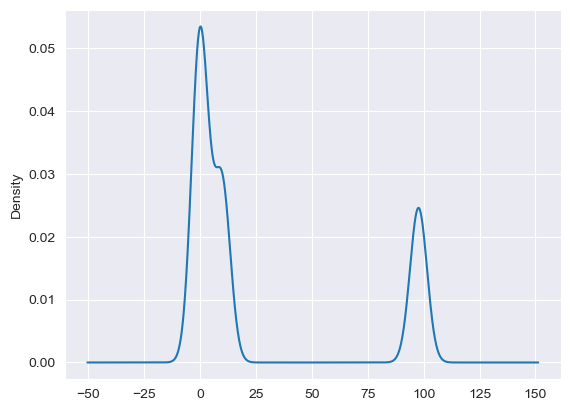

In [71]:
df.eficiencia.plot.kde();

Hay dos grupos claramente diferenciados y uno de ellos es claramente ineficiente.

Pero de momento lo dejamos apuntado y más adelante revisaremos que entidad es la que está teniendo problemas: planta, inverter, etc.

## REORDENACION DEL DATAFRAME

En este caso es muy importante seguir el plan definido en el diseño del proyecto, ya que existe un orden muy claro en el proceso: factores ambientales --> kw_dc --> kw ac.

Así que vamos a reorganizar las columnas del df para que nos ayude a interpretar en este orden.

In [72]:
orden = ['planta','mes','dia','hora','minuto','sensor_id','irradiacion','t_ambiente','t_modulo','inverter_id','kw_dc','kw_ac','eficiencia','kw_dia','kw_total']

In [73]:
df = df[orden]
df.head()

planta  mes  dia  hora  minuto        sensor_id     irradiacion  \
fecha                                                                        
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   
2020-05-15     p1    5   15     0       0  HmiyD2TTLFNqkNe            0.00   

                t_ambiente        t_modulo      inverter_id           kw_dc  \
fecha                                                                         
2020-05-15           25.18           22.86  1BY6WEcLGh8j5v7            0.00   
2020-05-15           25.18           22.86  1IF53ai7Xc0U56Y            0.00   
2020-05-15           25.18           22.86  3PZuoBAID5Wc2HD            0.00   
2020-05-15           25.18           22.86  7JYdWkrLSPkdwr4            0.00   
2020-05-15           25.18           22.86  McdE0feGgRqW7Ca            0.00   

                     kw_ac      eficiencia          kw_dia        kw_total  
fecha                                                                       
2020-05-15            0.00            0.00            0.00      6259559.00  
2020-05-15            0.00            0.00            0.00      6183645.00  
2020-05-15            0.00            0.00            0.00      6987759.00  
2020-05-15            0.00            0.00            0.00      7602960.00  
2020-05-15            0.00            0.00            0.00      7158964.00

## DATAFRAME DIARIO

En nivel de análisis al que tenemos los datos es cada 15 minutos, lo cual puede ser demasiado desagregado para ciertos análisis.

Vamos a dejar construída una versión del dataframe agregada a nivel dia.

Para ello usamos resample para hacer downgrading.

Deberemos agregar por planta e inverter que son los campos clave de nuestro dataset.

Como tenemos variables a las que aplican diferentes funciones de agregación podemos usar el formato de diccionario de agg()

In [74]:
df_dia = df.groupby(['planta', 'inverter_id']).resample('D') \
    .agg({'irradiacion': [min,np.mean,max],
          't_ambiente': [min,np.mean,max],
          't_modulo': [min,np.mean,max],
          'kw_dc': [min,np.mean,max,sum],
          'kw_ac': [min,np.mean,max,sum],
          'eficiencia': [min,np.mean,max],
          'kw_dia': max,
          'kw_total': max})

In [75]:
df_dia

irradiacion                  \
                                              min            mean   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15            0.00            0.20   
                       2020-05-16            0.00            0.21   
                       2020-05-17            0.00            0.24   
                       2020-05-18            0.00            0.16   
                       2020-05-19            0.00            0.19   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13            0.00            0.22   
                       2020-06-14            0.00            0.23   
                       2020-06-15            0.00            0.19   
                       2020-06-16            0.00            0.17   
                       2020-06-17            0.00            0.12   

                                                       t_ambiente  \
                                              max             min   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15            0.89           22.04   
                       2020-05-16            0.81           21.50   
                       2020-05-17            1.00           21.21   
                       2020-05-18            0.97           20.96   
                       2020-05-19            0.84           22.39   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13            0.93           22.20   
                       2020-06-14            0.92           23.65   
                       2020-06-15            0.83           24.00   
                       2020-06-16            0.77           23.63   
                       2020-06-17            0.58           22.55   

                                                                   \
                                             mean             max   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15           27.43           34.43   
                       2020-05-16           26.78           32.52   
                       2020-05-17           26.69           35.25   
                       2020-05-18           23.85           28.37   
                       2020-05-19           25.34           30.37   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13           26.12           31.91   
                       2020-06-14           27.02           32.96   
                       2020-06-15           26.56           31.61   
                       2020-06-16           26.37           30.83   
                       2020-06-17           24.85           29.04   

                                         t_modulo                  \
                                              min            mean   
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15           20.29           32.58   
                       2020-05-16           19.59           31.86   
                       2020-05-17           20.38           32.74   
                       2020-05-18           19.48           27.81   
                       2020-05-19           20.06           29.73   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13           20.88           30.39   
                       2020-06-14           22.12           31.59   
                       2020-06-15           23.00           30.00   
                       2020-06-16           22.56           29.59   
                       2020-06-17           21.91           26.67   

                                                            kw_dc  ...  \
                                              max             min  ...   
planta inverter_id    

### Quitar el mult-indice de las columnas

Nos lo ha generado con multi índice, tanto en filas como en columnas.

Para quitar el de las columnas podemos aplanar los nombres con .to_flat_index() de pandas.

Esto devuelve los niveles en tuplas, que luego podemos unir con un list comprehension.

In [76]:
tuplas = df_dia.columns.to_flat_index()
tuplas

Index([ ('irradiacion', 'min'), ('irradiacion', 'mean'),
        ('irradiacion', 'max'),   ('t_ambiente', 'min'),
        ('t_ambiente', 'mean'),   ('t_ambiente', 'max'),
           ('t_modulo', 'min'),    ('t_modulo', 'mean'),
           ('t_modulo', 'max'),        ('kw_dc', 'min'),
             ('kw_dc', 'mean'),        ('kw_dc', 'max'),
              ('kw_dc', 'sum'),        ('kw_ac', 'min'),
             ('kw_ac', 'mean'),        ('kw_ac', 'max'),
              ('kw_ac', 'sum'),   ('eficiencia', 'min'),
        ('eficiencia', 'mean'),   ('eficiencia', 'max'),
             ('kw_dia', 'max'),     ('kw_total', 'max')],
      dtype='object')

Y unimos ambas partes del par con un guión bajo usando .join en el list comprehension

In [77]:
df_dia.columns = ["_".join(par) for par in tuplas]
df_dia

irradiacion_min  irradiacion_mean  \
planta inverter_id     fecha                                           
p1     1BY6WEcLGh8j5v7 2020-05-15             0.00              0.20   
                       2020-05-16             0.00              0.21   
                       2020-05-17             0.00              0.24   
                       2020-05-18             0.00              0.16   
                       2020-05-19             0.00              0.19   
...                                            ...               ...   
p2     xoJJ8DcxJEcupym 2020-06-13             0.00              0.22   
                       2020-06-14             0.00              0.23   
                       2020-06-15             0.00              0.19   
                       2020-06-16             0.00              0.17   
                       2020-06-17             0.00              0.12   

                                   irradiacion_max  t_ambiente_min  \
planta inverter_id     fecha                                         
p1     1BY6WEcLGh8j5v7 2020-05-15             0.89           22.04   
                       2020-05-16             0.81           21.50   
                       2020-05-17             1.00           21.21   
                       2020-05-18             0.97           20.96   
                       2020-05-19             0.84           22.39   
...                                            ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13             0.93           22.20   
                       2020-06-14             0.92           23.65   
                       2020-06-15             0.83           24.00   
                       2020-06-16             0.77           23.63   
                       2020-06-17             0.58           22.55   

                                   t_ambiente_mean  t_ambiente_max  \
planta inverter_id     fecha                                         
p1     1BY6WEcLGh8j5v7 2020-05-15            27.43           34.43   
                       2020-05-16            26.78           32.52   
                       2020-05-17            26.69           35.25   
                       2020-05-18            23.85           28.37   
                       2020-05-19            25.34           30.37   
...                                            ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13            26.12           31.91   
                       2020-06-14            27.02           32.96   
                       2020-06-15            26.56           31.61   
                       2020-06-16            26.37           30.83   
                       2020-06-17            24.85           29.04   

                                     t_modulo_min   t_modulo_mean  \
planta inverter_id     fecha                                        
p1     1BY6WEcLGh8j5v7 2020-05-15           20.29           32.58   
                       2020-05-16           19.59           31.86   
                       2020-05-17           20.38           32.74   
                       2020-05-18           19.48           27.81   
                       2020-05-19           20.06           29.73   
...                                           ...             ...   
p2     xoJJ8DcxJEcupym 2020-06-13           20.88           30.39   
                       2020-06-14           22.12           31.59   
                       2020-06-15           23.00           30.00   
                       2020-06-16           22.56           29.59   
                       2020-06-17           21.91           26.67   

                                     t_modulo_max       kw_dc_min  ...  \
planta inverter_id     fecha                                       ...   
p1     1BY6WEcLGh8j5v7 2020-05-15           55.03            0.00  ...   
                       2020-05-16           54.23            0.00  ...   
                       2020-05-17           63.15            0.00  ...   
        

### Quitar el mult-indice de las filas

Ahora tenemos que pasar planta e inverter_id a columnas, y dejar la fecha como el índice.

In [78]:
df_dia = df_dia.reset_index().set_index('fecha')
df_dia

planta      inverter_id  irradiacion_min  irradiacion_mean  \
fecha                                                                   
2020-05-15     p1  1BY6WEcLGh8j5v7             0.00              0.20   
2020-05-16     p1  1BY6WEcLGh8j5v7             0.00              0.21   
2020-05-17     p1  1BY6WEcLGh8j5v7             0.00              0.24   
2020-05-18     p1  1BY6WEcLGh8j5v7             0.00              0.16   
2020-05-19     p1  1BY6WEcLGh8j5v7             0.00              0.19   
...           ...              ...              ...               ...   
2020-06-13     p2  xoJJ8DcxJEcupym             0.00              0.22   
2020-06-14     p2  xoJJ8DcxJEcupym             0.00              0.23   
2020-06-15     p2  xoJJ8DcxJEcupym             0.00              0.19   
2020-06-16     p2  xoJJ8DcxJEcupym             0.00              0.17   
2020-06-17     p2  xoJJ8DcxJEcupym             0.00              0.12   

            irradiacion_max  t_ambiente_min  t_ambiente_mean  t_ambiente_max  \
fecha                                                                          
2020-05-15             0.89           22.04            27.43           34.43   
2020-05-16             0.81           21.50            26.78           32.52   
2020-05-17             1.00           21.21            26.69           35.25   
2020-05-18             0.97           20.96            23.85           28.37   
2020-05-19             0.84           22.39            25.34           30.37   
...                     ...             ...              ...             ...   
2020-06-13             0.93           22.20            26.12           31.91   
2020-06-14             0.92           23.65            27.02           32.96   
2020-06-15             0.83           24.00            26.56           31.61   
2020-06-16             0.77           23.63            26.37           30.83   
2020-06-17             0.58           22.55            24.85           29.04   

              t_modulo_min   t_modulo_mean  ...       kw_dc_sum  \
fecha                                       ...                   
2020-05-15           20.29           32.58  ...       235340.70   
2020-05-16           19.59           31.86  ...       256629.88   
2020-05-17           20.38           32.74  ...       288039.82   
2020-05-18           19.48           27.81  ...       204030.30   
2020-05-19           20.06           29.73  ...       232277.27   
...                    ...             ...  ...             ...   
2020-06-13           20.88           30.39  ...        27443.74   
2020-06-14           22.12           31.59  ...        30768.78   
2020-06-15           23.00           30.00  ...        25597.24   
2020-06-16           22.56           29.59  ...        22335.69   
2020-06-17           21.91           26.67  ...        17640.42   

                 kw_ac_min      kw_ac_mean       kw_ac_max       kw_ac_sum  \
fecha                                                                        
2020-05-15            0.00          247.81         1039.35        23046.55   
2020-05-16            0.00          285.51         1095.29        25124.49   
2020-05-17            0.00          293.47         1114.81        28172.85   
2020-05-18            0.00          208.03         1193.63        19970.51   
2020-05-19            0.00          244.53         1059.80        22741.18   
...                    ...             ...             ...             ...   
2020-06-13            0.00          279.59         1239.95        26840.58   
2020-06-14            0.00          313.43         1328.21        30088.97   
2020-06-15            0.00          260.93         1256.67        25049.49   
2020-06-16            0.00          227.82         1098.21        21870.63   
2020-06-17            0.00          179.98          810.77        17278.51   

            eficiencia_min  eficiencia_mean  eficiencia_max      kw_dia_max  \
fecha                                                 

Guardo los dataframes transformados

In [79]:
df.to_pickle('../Datos/df.pickle')
df_dia.to_pickle('../Datos/df_dia.pickle')

# ANALISIS E INSIGHTS

**Carga de datos**

In [80]:
df = pd.read_pickle('../Datos/df.pickle')
df_dia = pd.read_pickle('../Datos/df_dia.pickle')

La primera palanca es la recepción de la energía solar.

Tenemos 3 kpis con los que medir esta palanca: irradiación que llega, temperatura ambiente y temperatura del módulo.

Estos kpis se miden con un único sensor por planta, así que el dato es el mismo para todos los inverters de una misma planta.

Dado que da igual el inverter y solo necesitamos esas 3 variables vamos a crear un dataset más pequeño con solo un inverter de cada planta para trabajar sobre el.

In [81]:
df

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
...                             ...             ...             ...   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 00:00:00  1BY6WEcLGh8j5v7            0.00            0.00   
2020-05-15 00:00:00  1IF53ai7Xc0U56Y            0.00            0.00   
2020-05-15 00:00:00  3PZuoBAID5Wc2HD            0.00            0.00   
2020-05-15 00:00:00  7JYdWkrLSPkdwr4            0.00            0.00   
2020-05-15 00:00:00  McdE0feGgRqW7Ca            0.00            0.00   
...                              ...             ...             ...   
2020-06-17 23:45:00  q49J1IKaHRwDQnt            0.00            0.00   
2020-06-17 23:45:00  rrq4fwE8jgrTyWY            0.00            0.00   
2020-06-17 23:45:00  vOuJvMaM2sgwLmb            0.00            0.00   
2020-06-17 23:45:00  xMbIugepa2P7lBB            0.00            0.00   
2020-06-17 23:45:00  xoJJ8DcxJEcupym            0.00            0.00   

                         eficiencia          kw_dia        kw_total  
fecha                                                                
2020-05-15 00:00:00            0.00            0.00      6259559.00  
2020-05-15 00:00:00            0.00            0.00      6183645.00  
2020-05-15 00:00:00            0.00            0.00      6987759.00  
2020-05-15 00:00:00            0.00            0.00      7602960.00  
2020-05-15 00:00:00            0.00            0.00      7158964.00  
...                             ...             ...             ...  
2020-06-17 23:45:00            0.00         4157.00       520758.00  
2020-06-17 23:45:00            0.00         3931.00    121131356.00  
2020-06-17 23:45:00            0.00         4322.00      2427691.00  
2020-06-17 23:45:00            0.00         4218.00    106896394.00  
2020-06-17 23:45:00            0.00         4316.00    209335741.00  

[136472 rows x 15 columns]

In [82]:
recepcion = df.loc[(df.inverter_id == '1BY6WEcLGh8j5v7') | (df.inverter_id == 'q49J1IKaHRwDQnt'), 'planta':'t_modulo']
recepcion

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:15:00     p1    5   15     0      15  HmiyD2TTLFNqkNe   
2020-05-15 00:30:00     p1    5   15     0      30  HmiyD2TTLFNqkNe   
2020-05-15 00:45:00     p1    5   15     0      45  HmiyD2TTLFNqkNe   
2020-05-15 01:00:00     p1    5   15     1       0  HmiyD2TTLFNqkNe   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 22:45:00     p2    6   17    22      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:00:00     p2    6   17    23       0  iq8k7ZNt4Mwm3w0   
2020-06-17 23:15:00     p2    6   17    23      15  iq8k7ZNt4Mwm3w0   
2020-06-17 23:30:00     p2    6   17    23      30  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   

                        irradiacion      t_ambiente        t_modulo  
fecha                                                                
2020-05-15 00:00:00            0.00           25.18           22.86  
2020-05-15 00:15:00            0.00           25.08           22.76  
2020-05-15 00:30:00            0.00           24.94           22.59  
2020-05-15 00:45:00            0.00           24.85           22.36  
2020-05-15 01:00:00            0.00           24.62           22.17  
...                             ...             ...             ...  
2020-06-17 22:45:00            0.00           23.51           22.86  
2020-06-17 23:00:00            0.00           23.48           22.74  
2020-06-17 23:15:00            0.00           23.35           22.49  
2020-06-17 23:30:00            0.00           23.29           22.37  
2020-06-17 23:45:00            0.00           23.20           22.54  

[6413 rows x 9 columns]

## IRRADIACIÓN: preguntas semilla

### ¿Las dos plantas reciben la misma cantidad de energía solar?

In [83]:
# para irradiacion considero la suma (de acuerdo a la recomendacion del experto de negocio)
temp = recepcion.groupby('planta').agg(irradiacion_acumulada = ('irradiacion', 'sum'), t_amb_media = ('t_ambiente', 'mean'),
                                       t_mod_media = ('t_modulo', 'mean'))
temp

irradiacion_acumulada     t_amb_media     t_mod_media
planta                                                       
p1                     726.40           25.56           31.18
p2                     758.49           28.07           32.77

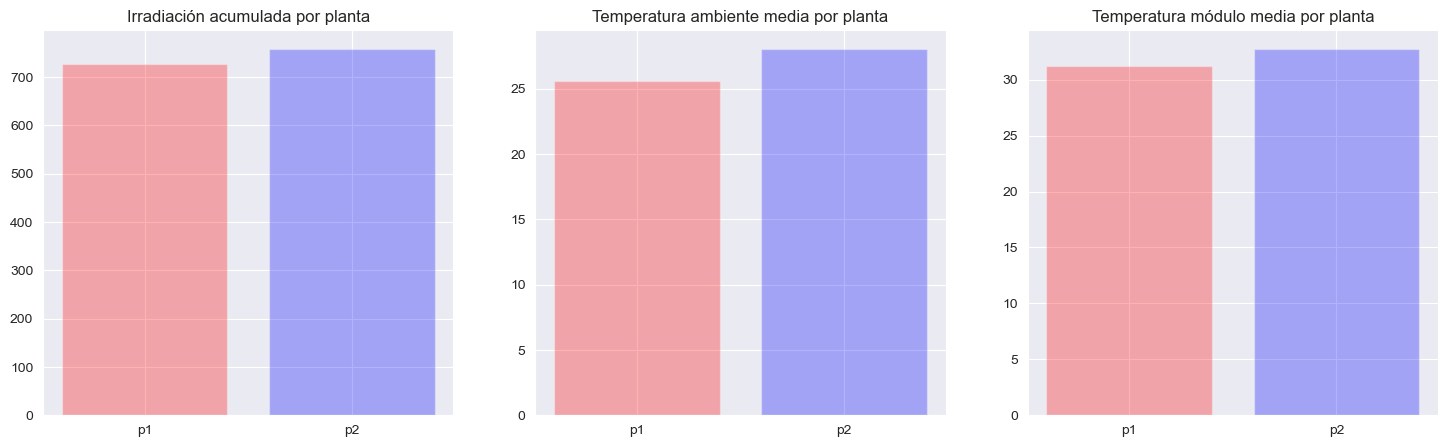

In [84]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize = (18,5))

ax[0].bar(temp.index, temp.irradiacion_acumulada, color = ['red','blue'], alpha = 0.3)
ax[1].bar(temp.index, temp.t_amb_media, color = ['red','blue'], alpha = 0.3)
ax[2].bar(temp.index, temp.t_mod_media, color = ['red','blue'], alpha = 0.3)
ax[0].set_title('Irradiación acumulada por planta')
ax[1].set_title('Temperatura ambiente media por planta')
ax[2].set_title('Temperatura módulo media por planta');

Conclusiones:

- En general la planta 2 recibe más energía solar que la 1
- Pero esta diferencia no puede implicar el problema de rendimiento que supuestamente existe

### Relación entre irradiación  y temperatura

In [85]:
temp = recepcion.loc[:,['planta','irradiacion','t_ambiente','t_modulo']]
temp

planta     irradiacion      t_ambiente        t_modulo
fecha                                                                     
2020-05-15 00:00:00     p1            0.00           25.18           22.86
2020-05-15 00:15:00     p1            0.00           25.08           22.76
2020-05-15 00:30:00     p1            0.00           24.94           22.59
2020-05-15 00:45:00     p1            0.00           24.85           22.36
2020-05-15 01:00:00     p1            0.00           24.62           22.17
...                    ...             ...             ...             ...
2020-06-17 22:45:00     p2            0.00           23.51           22.86
2020-06-17 23:00:00     p2            0.00           23.48           22.74
2020-06-17 23:15:00     p2            0.00           23.35           22.49
2020-06-17 23:30:00     p2            0.00           23.29           22.37
2020-06-17 23:45:00     p2            0.00           23.20           22.54

[6413 rows x 4 columns]

Análisis de correlación

In [86]:
temp.corr()

C:\Users\Poitou\AppData\Local\Temp\ipykernel_4828\1074013116.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp.corr()


irradiacion      t_ambiente        t_modulo
irradiacion            1.00            0.65            0.95
t_ambiente             0.65            1.00            0.82
t_modulo               0.95            0.82            1.00

C:\Users\Poitou\AppData\Local\Temp\ipykernel_4828\4187988449.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(temp.corr(), annot=True);


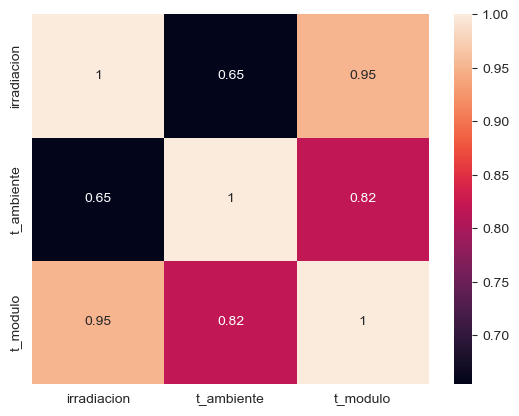

In [87]:
sns.heatmap(temp.corr(), annot=True);

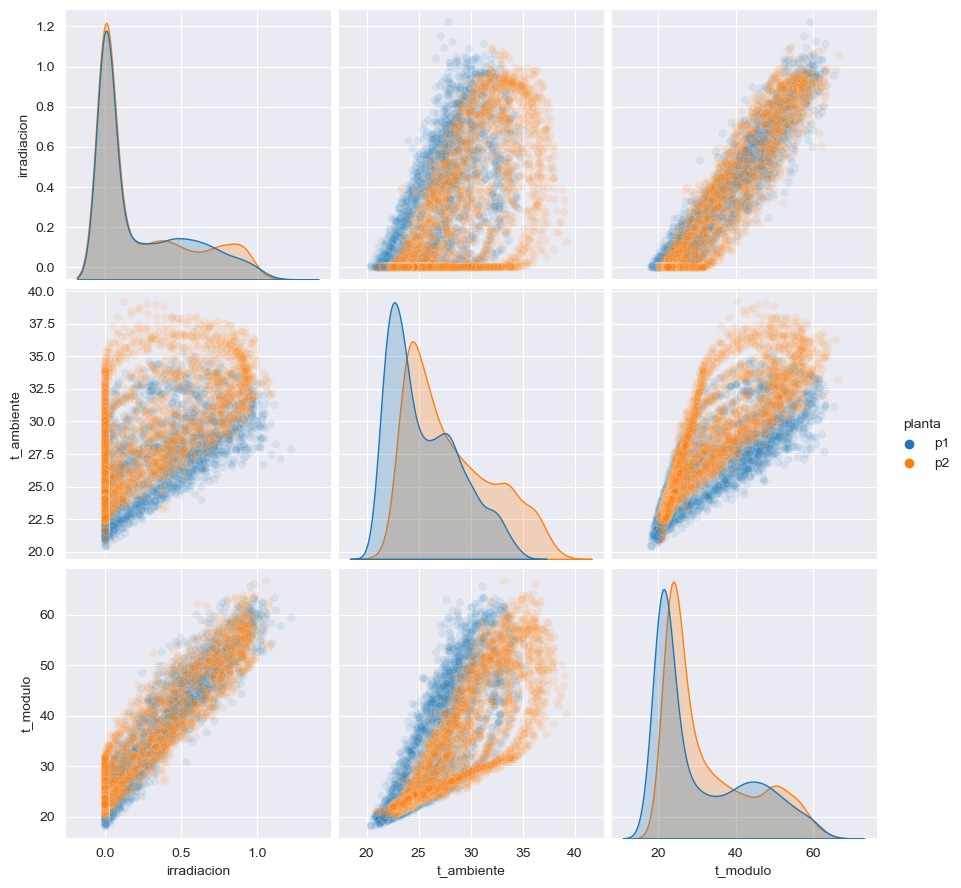

In [88]:
sns.pairplot(temp.reset_index(), hue = 'planta', height=3, plot_kws={'alpha': 0.1});

Conclusiones:

- La irradiación tiene una alta correlacion con la temperatura del módulo
- Pero no tanto con la temperatura ambiente (seguramente explicado porque la temperatura ampiente demora en subir cuando aumenta la irradación y por tanto presenta un lag.
- Una primera forma de identificar módulos defectuosos o sucios es localizar los que produzcan poco cuando la irradiación es alta

### Distribución de la irradiación y la temperatura a lo largo del día

Hago un tabla cruzada por hora y por planta para ver la media de la irradiación.

In [89]:
temp = pd.crosstab(recepcion.hora,recepcion.planta,values = recepcion.irradiacion,aggfunc='mean')
temp

planta              p1              p2
hora                                  
0                 0.00            0.00
1                 0.00            0.00
2                 0.00            0.00
3                 0.00            0.00
4                 0.00            0.00
5                 0.00            0.00
6                 0.04            0.04
7                 0.19            0.19
8                 0.37            0.39
9                 0.53            0.57
10                0.64            0.69
11                0.73            0.76
12                0.74            0.79
13                0.69            0.69
14                0.58            0.60
15                0.46            0.44
16                0.29            0.28
17                0.13            0.12
18                0.02            0.02
19                0.00            0.00
20                0.00            0.00
21                0.00            0.00
22                0.00            0.00
23                0.00            0.00

Lo vemos ahora con un mapa de calor

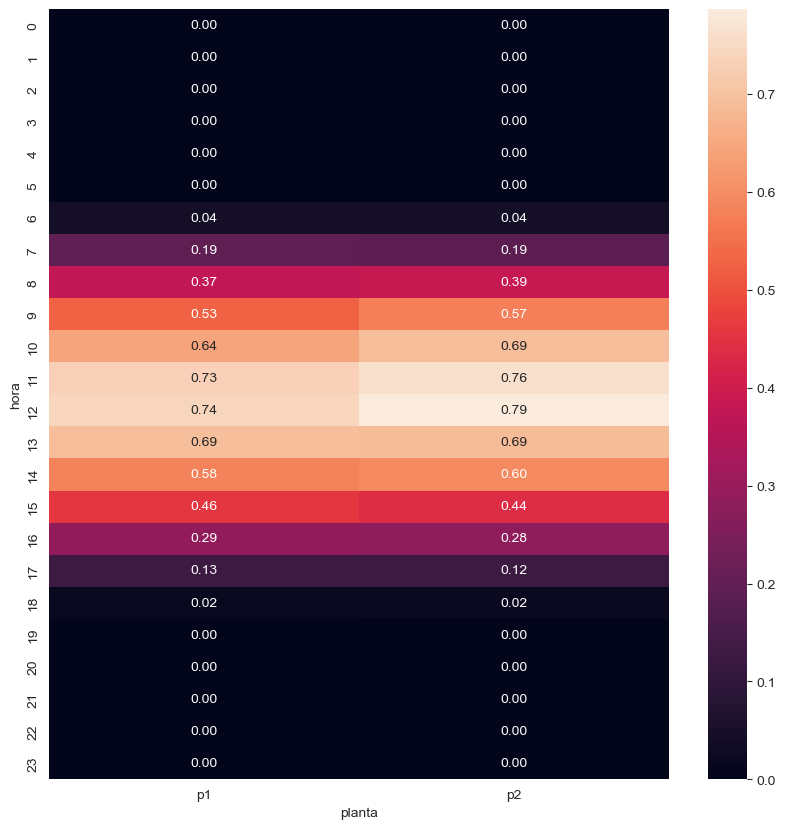

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(temp, annot=True, fmt=".2f");

La irradiación máxima se da en ambas plantas a las 12. Antes de las 7 am y luego de las 18 pm se puede decir que no hay irradiación.

Ahora hago una tabla cruzada por hora y por planta para ver la media de la temperatura ambiente.

In [91]:
temp = pd.crosstab(recepcion.hora,recepcion.planta,values = recepcion.t_ambiente,aggfunc='mean')
temp

planta              p1              p2
hora                                  
0                22.80           25.20
1                22.63           24.82
2                22.46           24.48
3                22.32           24.27
4                22.17           24.07
5                22.06           23.91
6                22.20           24.19
7                23.34           25.48
8                24.92           27.05
9                26.48           28.61
10               27.65           30.17
11               28.80           31.43
12               29.62           32.55
13               30.10           33.01
14               30.29           33.16
15               29.99           32.81
16               29.38           32.44
17               28.29           31.59
18               26.66           30.00
19               25.36           28.61
20               24.50           27.63
21               23.87           26.75
22               23.26           26.06
23               22.92           25.46

Lo veo en el heatmap

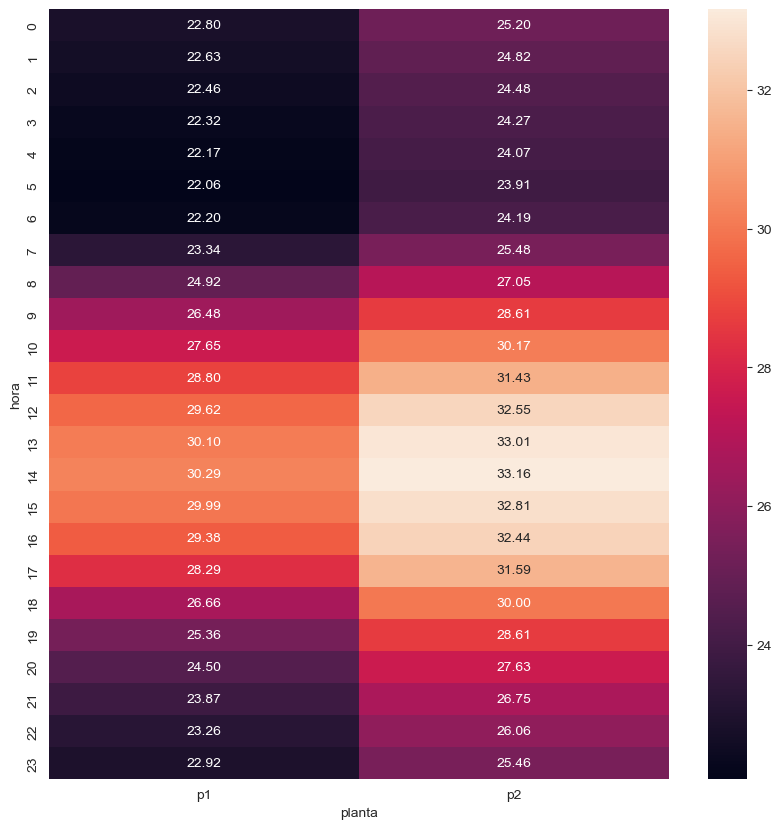

In [92]:
plt.figure(figsize=(10,10))
sns.heatmap(temp, annot=True, fmt=".2f");

En ambas plantas se llega al máximo de la temperatura ambiente a las 14:00, confirmando el lag (de 2 horas) con la irradiacion.

Conclusiones:

- Ambas plantas tienen patrones similares. Podríamos pensar que están en zonas geográficas no muy alejadas
- Existe irradiación (y por tanto a priori las plantas deberían producir) entre las 7 y las 17
- La irradiación máxima se produce entre las 11 y las 12
- La temperatura ambiente máxima se produce entre las 14 y las 16

## PLANTAS: preguntas semilla

### ¿Ambas plantas son igual de capaces de generar DC a partir de la irradiación?

veamos cómo se relacionan la generación de DC con la irradiación

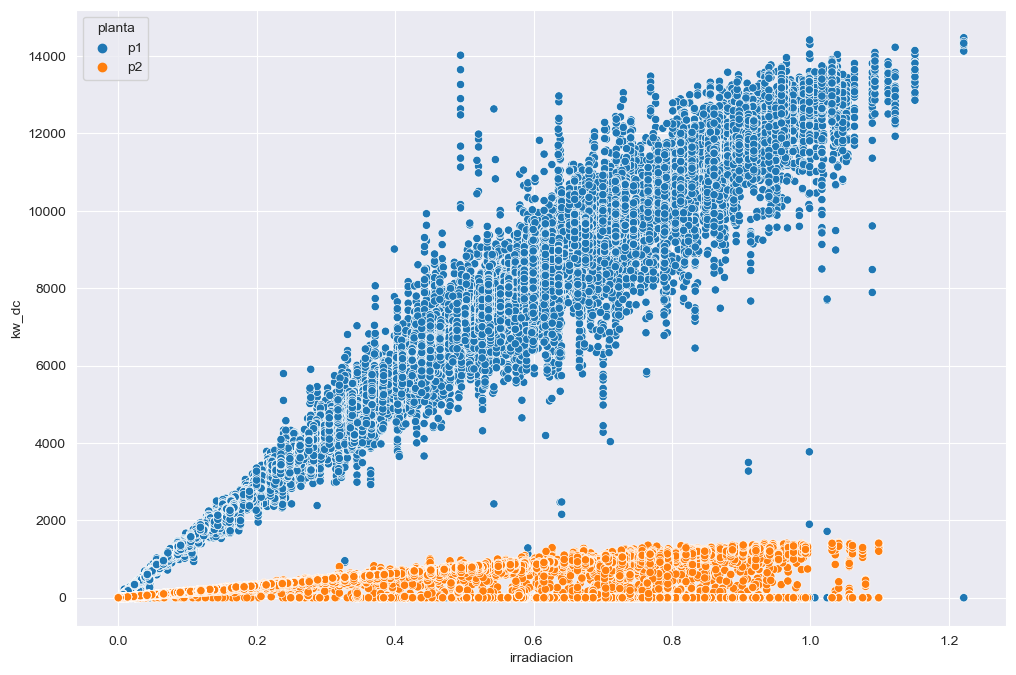

In [93]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = df, x = df.irradiacion, y = df.kw_dc, hue = 'planta');

La planta número 2 produce muchos menos kw que la planta 1 ante los mismos niveles de irradiación.

Vamos a validar la información que nos da kw_ac y kw_dc por un lado, y la info que nos da kw_dia y kw_total, teniendo en cuenta que antes habíamos visto que los datos de kw_ac y kw_dc no son coherentes con los kw_dia y kw_total.

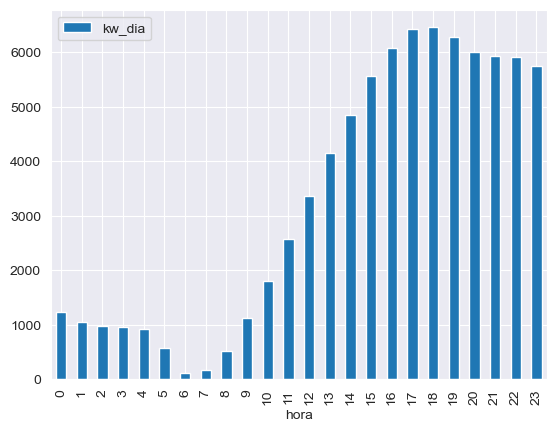

In [94]:
df.groupby('hora')[['kw_dia']].mean().plot.bar();

Considerando que el dato kw_dia es un acumulado (se resetea a las 0:00), vemos incoherencias:
- existe generación entre las 00 y las 06.

- a partir de las 18 comienza a decaer, lo cual no debería pasar si es un acumulado.

Conclusión:

No confiamos de las variables acumuladas como kw_dia y kw_total.

Para poder continuar vamos a asumir que los datos de kw_dc y kw_ac son correctos.

Y bajo esa asunción obtendremos nuestras conclusiones.

**INSIGHT #1**

La planta 2 genera niveles mucho más bajos de DC incluso a niveles similares de irradiación

## GENERACION: preguntas semilla

### ¿La generación es constante a lo largo de los días?

Podemos usar el df_dia para graficar la visión global de generación de DC durante el período de análisis.

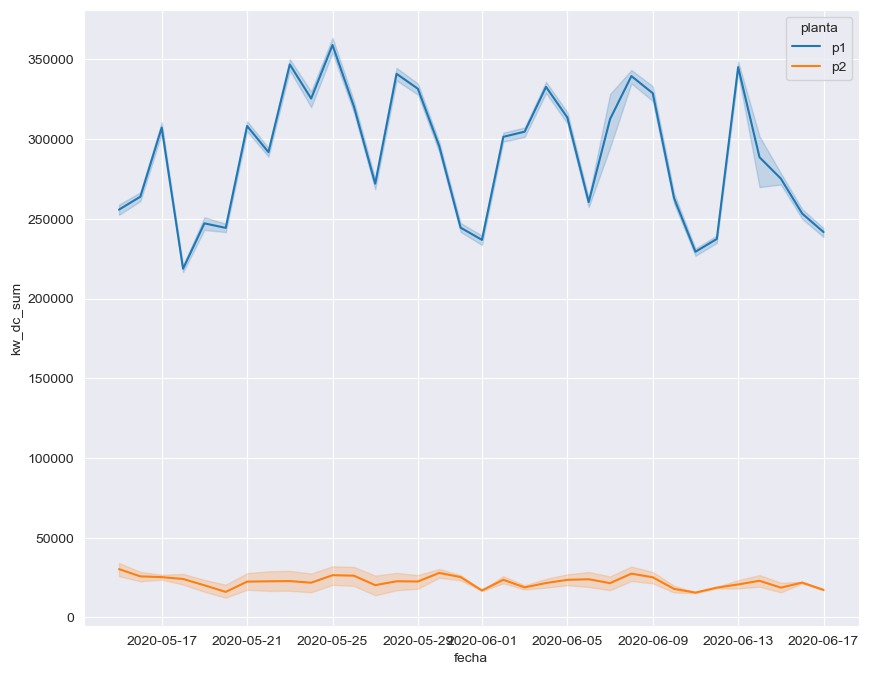

In [95]:
plt.figure(figsize = (10,8))
sns.lineplot(data = df_dia, x = df_dia.index, y = 'kw_dc_sum', hue = 'planta');

Vemos que la planta 1 tiene mucha más variabilidad mientras que la planta 2 es mucho más constante.

Pero sobre todo nos extraña los bajos niveles de generacion de DC en de la planta 2 en comparación con la 1.

Vamos a examinar la generación de cada día.

Generamos una variable date para poder agregar por ésta.

In [100]:
df['date'] = df.index.date
df

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00     p1    5   15     0       0  HmiyD2TTLFNqkNe   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00     p2    6   17    23      45  iq8k7ZNt4Mwm3w0   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
2020-05-15 00:00:00            0.00           25.18           22.86   
...                             ...             ...             ...   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   
2020-06-17 23:45:00            0.00           23.20           22.54   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 00:00:00  1BY6WEcLGh8j5v7            0.00            0.00   
2020-05-15 00:00:00  1IF53ai7Xc0U56Y            0.00            0.00   
2020-05-15 00:00:00  3PZuoBAID5Wc2HD            0.00            0.00   
2020-05-15 00:00:00  7JYdWkrLSPkdwr4            0.00            0.00   
2020-05-15 00:00:00  McdE0feGgRqW7Ca            0.00            0.00   
...                              ...             ...             ...   
2020-06-17 23:45:00  q49J1IKaHRwDQnt            0.00            0.00   
2020-06-17 23:45:00  rrq4fwE8jgrTyWY            0.00            0.00   
2020-06-17 23:45:00  vOuJvMaM2sgwLmb            0.00            0.00   
2020-06-17 23:45:00  xMbIugepa2P7lBB            0.00            0.00   
2020-06-17 23:45:00  xoJJ8DcxJEcupym            0.00            0.00   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 00:00:00            0.00            0.00      6259559.00   
2020-05-15 00:00:00            0.00            0.00      6183645.00   
2020-05-15 00:00:00            0.00            0.00      6987759.00   
2020-05-15 00:00:00            0.00            0.00      7602960.00   
2020-05-15 00:00:00            0.00            0.00      7158964.00   
...                             ...             ...             ...   
2020-06-17 23:45:00            0.00         4157.00       520758.00   
2020-06-17 23:45:00            0.00         3931.00    121131356.00   
2020-06-17 23:45:00            0.00         4322.00      2427691.00   
2020-06-17 23:45:00            0.00         4218.00    106896394.00   
2020-06-17 23:45:00            0.00         4316.00    209335741.00   

                           date  
fecha                            
2020-05-15 00:00:00  2020-05-15  
2020-05-15 00:00:00  2020-05-15  
2020-05-15 00:00:00  2020-05-15  
2020-05-15 00:00:00  2020-05-15  
2020-05-15 00:00:00  2020-05-15  
...                         ...  
2020-06-17 23:45:00  2020-06-17  
2020-

**Planta 1**

Creamos un dataframe temporal para analizar la generación de DC horaria en cada día en la planta 1.

In [105]:
dc_p1 = df[df.planta == 'p1'].groupby(['planta', 'date', 'hora']).kw_dc.sum()
dc_p1

planta  date        hora
p1      2020-05-15  0                 0.00
                    1                 0.00
                    2                 0.00
                    3                 0.00
                    4                 0.00
                                 ...      
        2020-06-17  19                0.00
                    20                0.00
                    21                0.00
                    22                0.00
                    23                0.00
Name: kw_dc, Length: 796, dtype: float64

Vamos a pasar date a columnas, para poder respresentar cada columna (que son los dates) como una variable y luego como un gráfico independiente con subplots.

In [110]:
# level 1 es el 2do multiindice (date)
dc_p1.unstack(level = 1)

date             2020-05-15      2020-05-16      2020-05-17      2020-05-18  \
planta hora                                                                   
p1     0               0.00             NaN            0.00            0.00   
       1               0.00             NaN            0.00            0.00   
       2               0.00            0.00            0.00            0.00   
       3               0.00            0.00            0.00            0.00   
       4               0.00            0.00            0.00            0.00   
       5               0.00            0.00            0.00            0.00   
       6           50981.99        48975.18        32080.77        51656.43   
       7          173925.31       207292.57       242173.46       210673.27   
       8          371406.99       470620.55       512873.50       140741.09   
       9          502317.20       559489.09       723267.27       143262.84   
       10         583969.55       708576.71       907350.29       281863.16   
       11         677146.62       697296.63      1025608.21       548456.16   
       12         772694.83       837437.95       826249.52       730226.89   
       13         626126.96       766125.39       683349.84       925790.02   
       14         785869.46       650535.38       619761.54       604474.46   
       15         546353.00       484587.63       628015.77       666662.71   
       16         390470.50       242881.41       418062.17       368908.86   
       17         137272.51       120922.43       130939.25       126809.80   
       18           8704.22        11396.61         9862.96        13022.84   
       19              0.00            0.00            0.00            0.00   
       20              0.00            0.00            0.00            0.00   
       21              0.00            0.00            0.00            0.00   
       22              0.00            0.00            0.00            0.00   
       23              0.00            0.00            0.00            0.00   

date             2020-05-19      2020-05-20      2020-05-21      2020-05-22  \
planta hora                                                                   
p1     0               0.00            0.00             NaN            0.00   
       1               0.00            0.00             NaN            0.00   
       2               0.00            0.00             NaN            0.00   
       3               0.00            0.00             NaN            0.00   
       4               0.00            0.00             NaN            0.00   
       5               0.00            0.00             NaN            0.00   
       6           21895.75        48567.57             NaN        63238.34   
       7          242869.04       260964.30        76297.85       308776.84   
       8          280784.16       547730.36       527519.32       356639.80   
       9          595876.57       760212.75       808786.05       496513.19   
       10         651805.18       949093.43       734222.32       669893.89   
       11         475898.79      1064016.89      1045382.98       902382.14   
       12         468945.33      1120950.52       875804.46       961908.82   
       13         774521.57       522015.50       977007.34       920133.14   
       14         844728.46             NaN       739455.91       871788.63   
       15         558301.00             NaN       614382.46       547448.75   
       16         409339.77             NaN       310917.68       222682.29   
       17         112971.23        74780.93        62690.61        90621.88   
       18             18.00        27253.52         8601.16         8656.80   
       19              0.00            0.00            0.00            0.00   
       20              0.00            0.00            0.00            0.00   
       21              0.00            0.00            0.00            0.00   
       22              0.00            0.00      

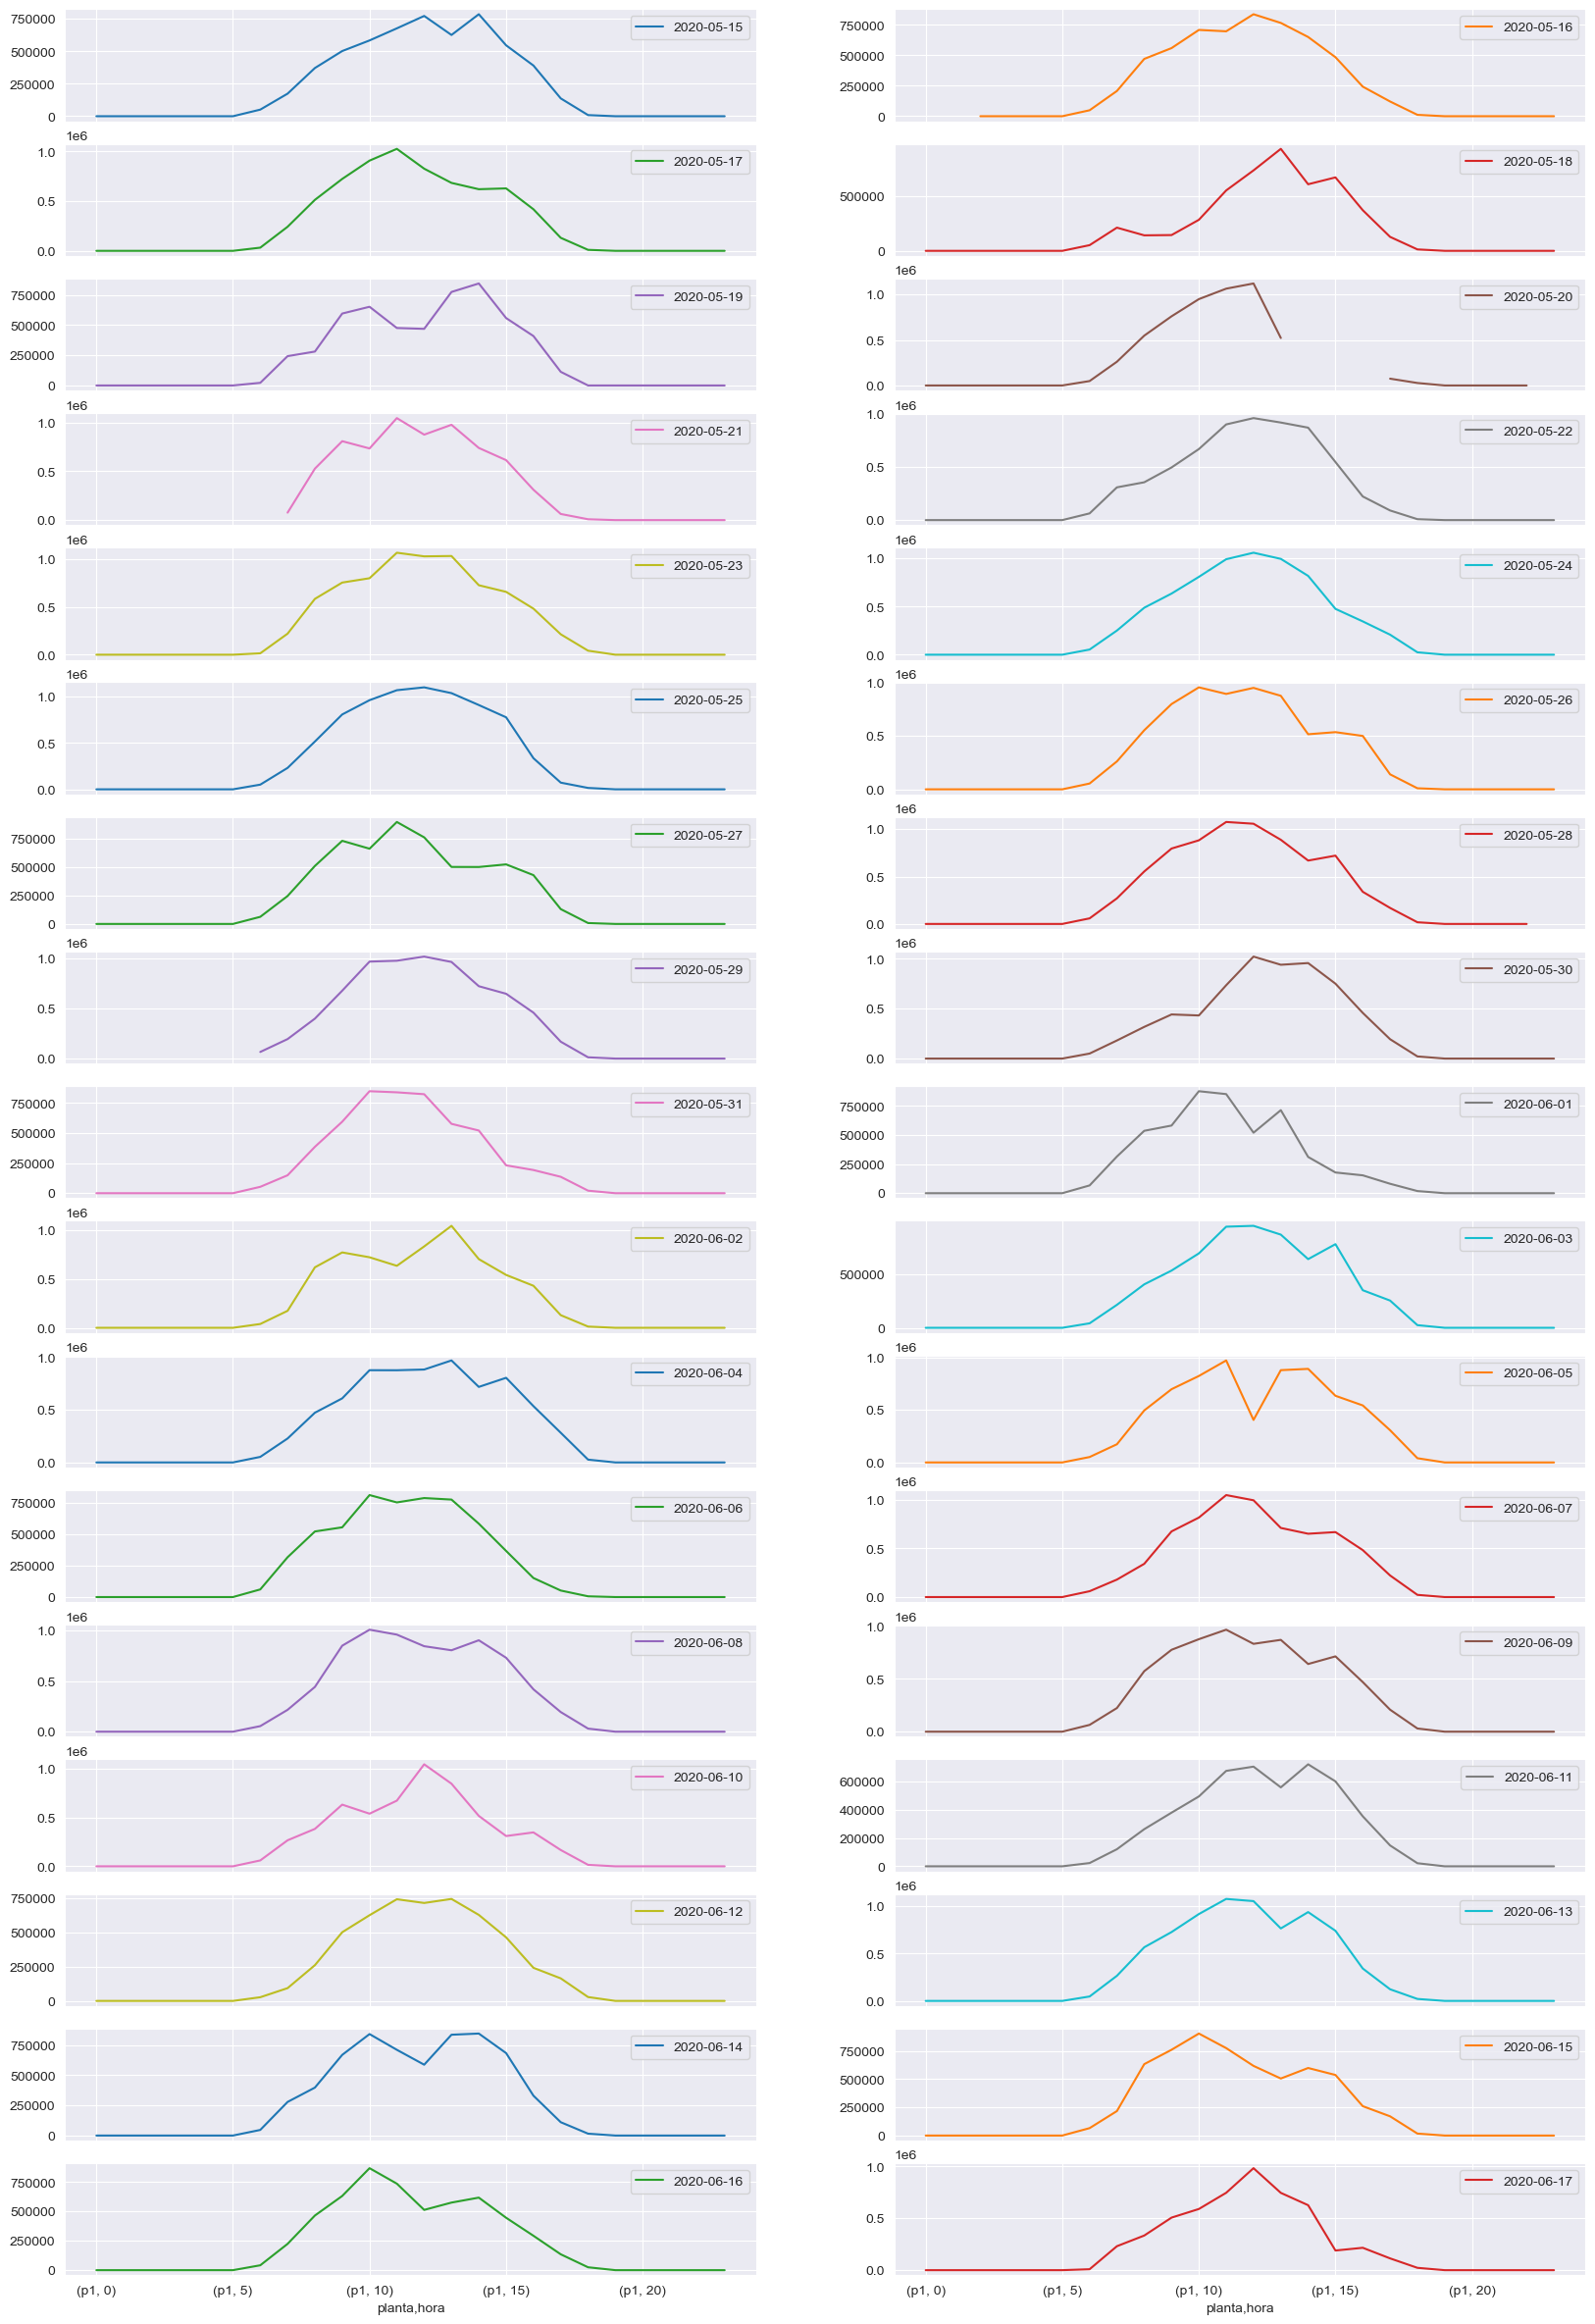

In [112]:
dc_p1.unstack(level = 1).plot(subplots = True, layout = (17,2), sharex=True, figsize=(20,30));

**Planta 2**

In [113]:
dc_p2 = df[df.planta == 'p2'].groupby(['planta', 'date', 'hora']).kw_dc.sum()
dc_p2

planta  date        hora
p2      2020-05-15  0                 0.00
                    1                 0.00
                    2                 0.00
                    3                 0.00
                    4                 0.00
                                 ...      
        2020-06-17  19                0.00
                    20                0.00
                    21                0.00
                    22                0.00
                    23                0.00
Name: kw_dc, Length: 816, dtype: float64

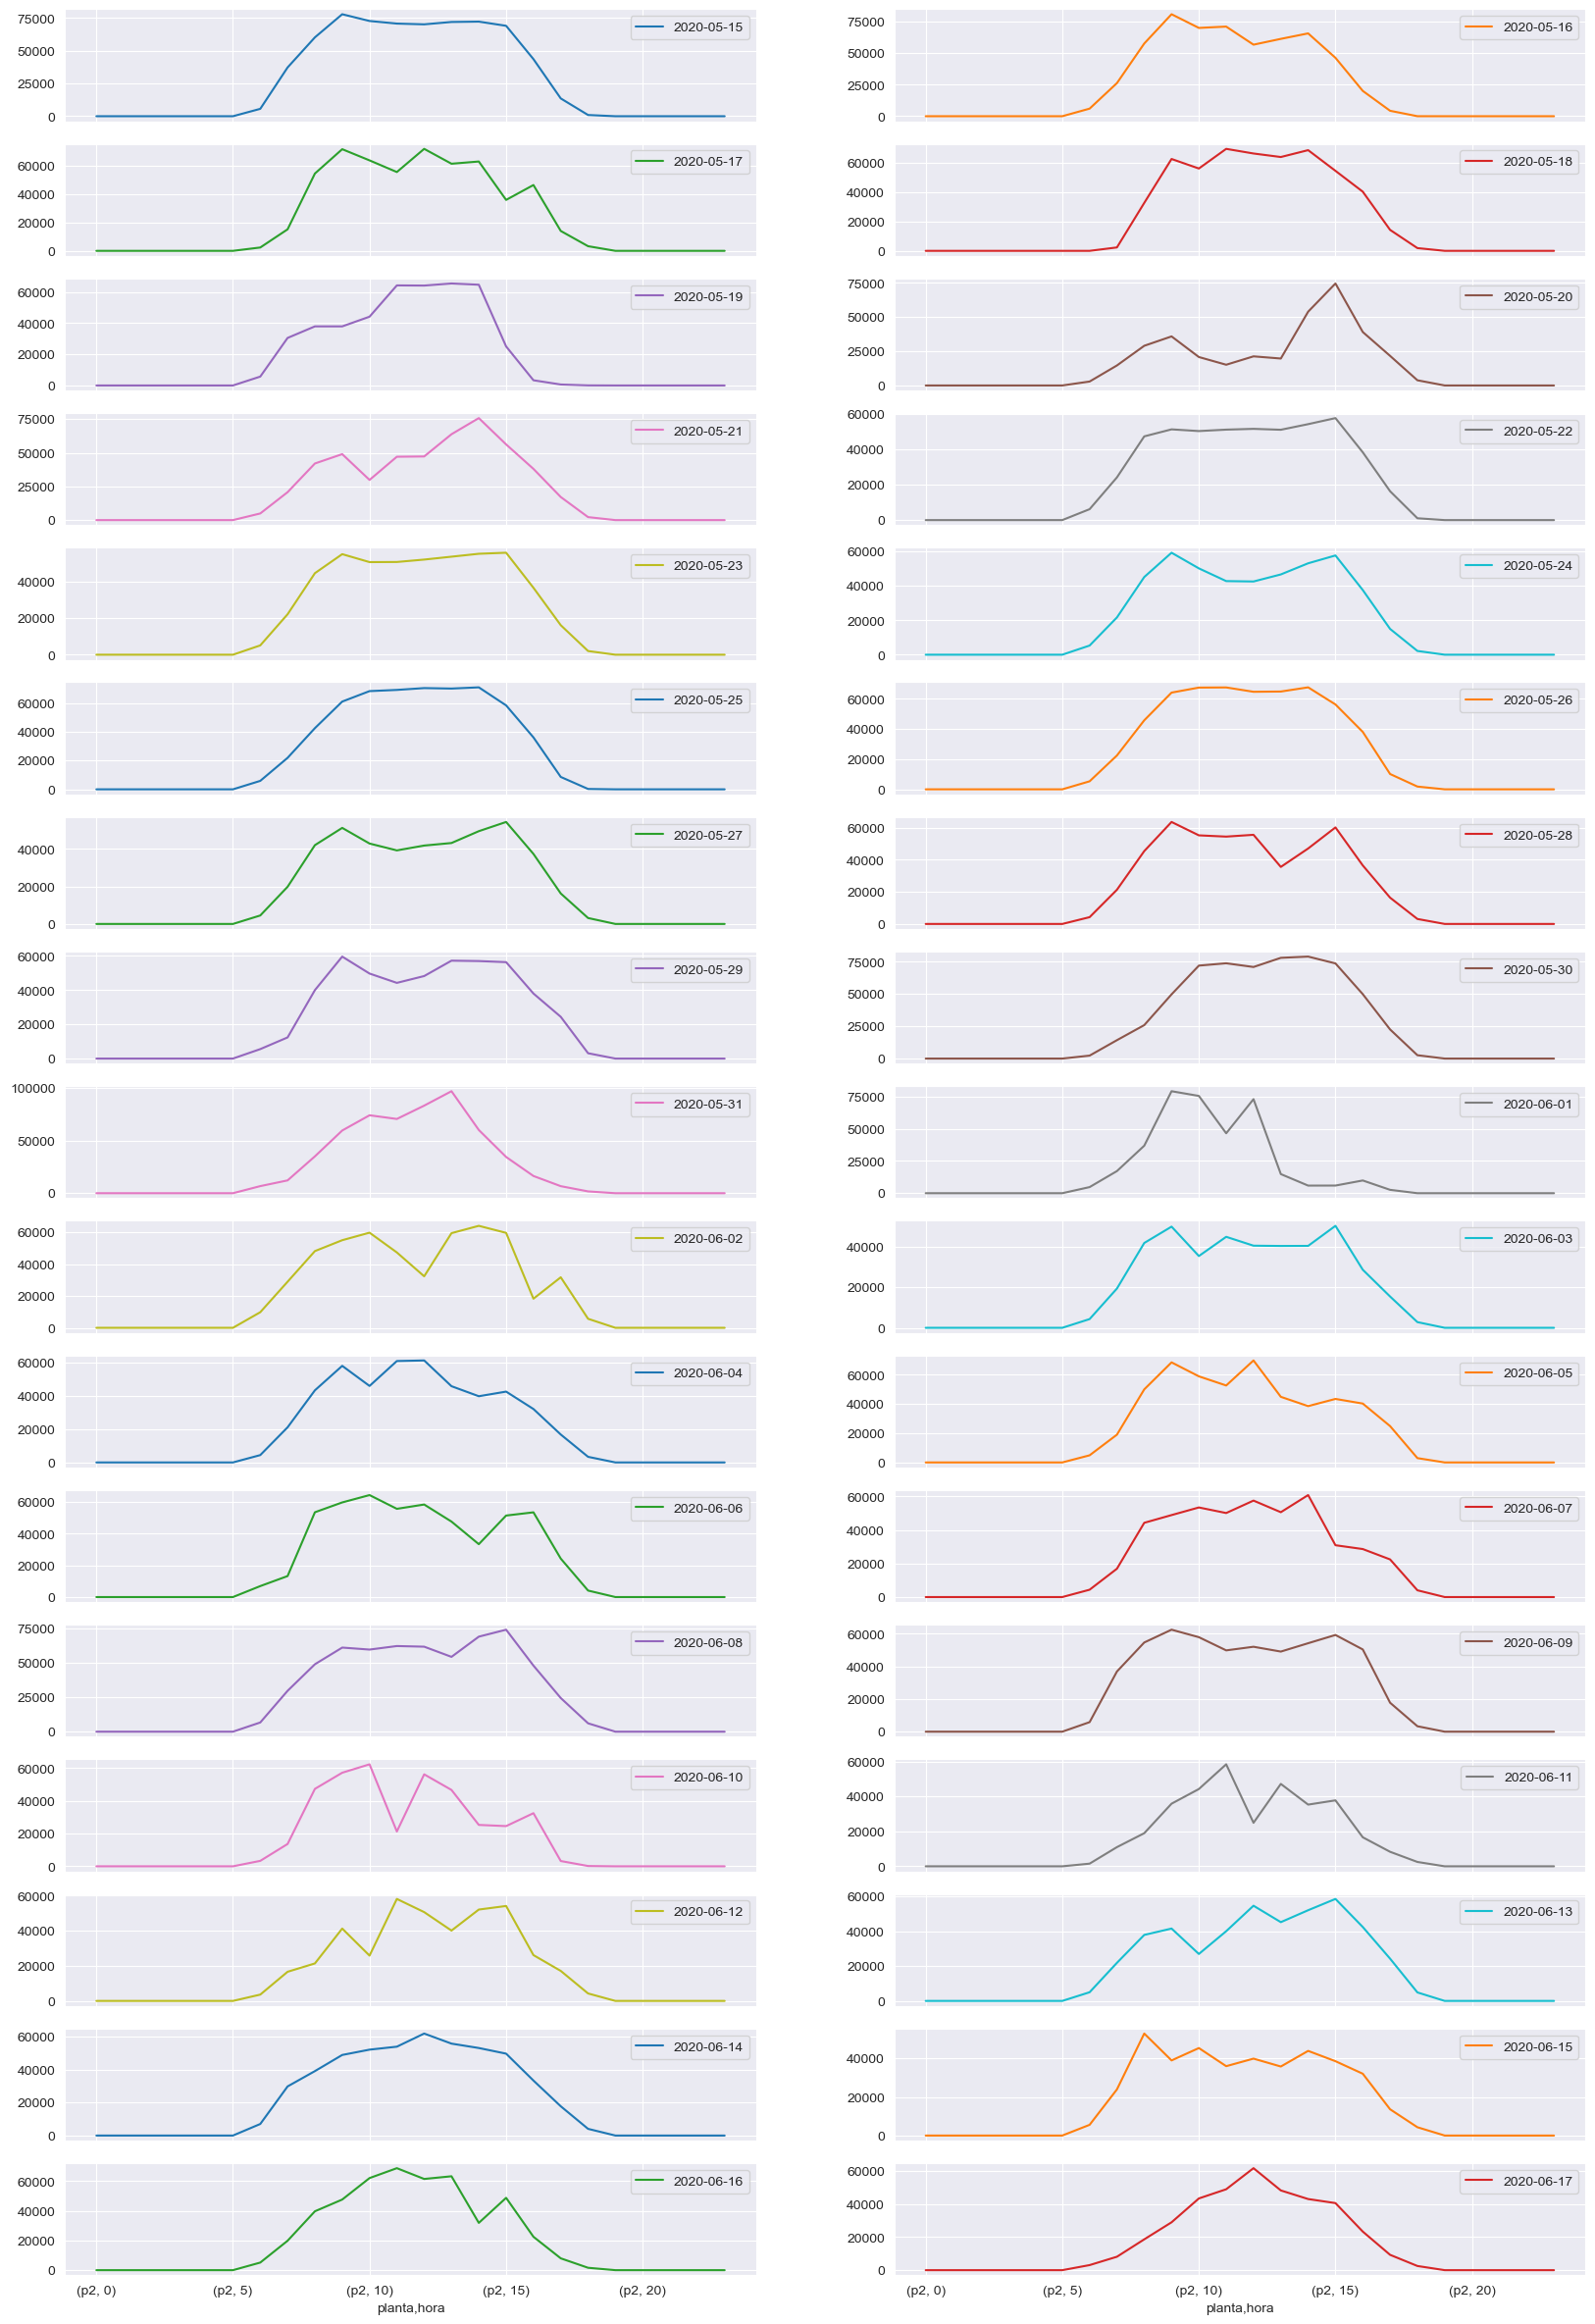

In [114]:
dc_p2.unstack(level = 1).plot(subplots = True, layout = (17,2), sharex=True, figsize=(20,30));

Conclusiones:

- En ambas plantas se mantienen unos patrones similares durante todos los días, a excepxion de aling dia puntual, pero cuyo comportamiento no parece ser estructural.
- Los niveles de producción son aproximadamente constantes durante los días, pero siempre la planta 2 unas 10 veces por debajo de los niveles de la planta 1.

**INSIGHT #2:** Los niveles bajos de la planta 2 son constantes y presentan unas curvas diarias que parecen normales.

### ¿Cual es la relación entre DC y generación de AC?

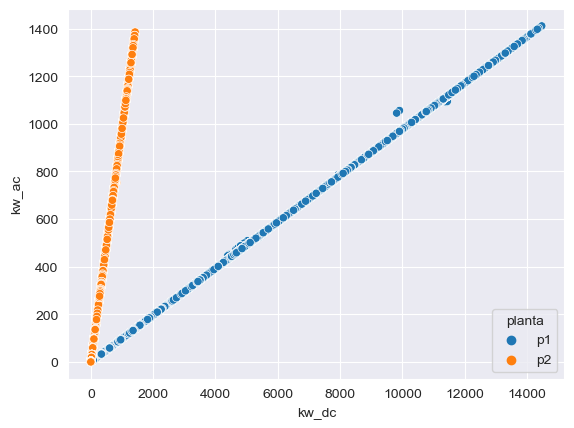

In [116]:
sns.scatterplot(data = df, x = df.kw_dc, y = df.kw_ac, hue = 'planta');

De nuevo los patrones son clarísimos: la planta 2 transforma la corriente de forma mucho más eficiente.

Analicemos ahora la variable  **Eficiencia**

In [124]:
temp = df.groupby(['planta', 'hora']).eficiencia.mean()
temp.unstack(level = 0)

planta              p1              p2
hora                                  
0                 0.00            0.00
1                 0.00            0.00
2                 0.00            0.00
3                 0.00            0.00
4                 0.00            0.00
5                 0.00            0.58
6                 9.20           92.93
7                 9.80           97.39
8                 9.81           97.42
9                 9.78           91.70
10                9.77           76.20
11                9.75           68.35
12                9.71           68.16
13                9.68           73.04
14                9.76           83.43
15                9.79           95.69
16                9.81           95.85
17                9.76           95.56
18                6.53           73.52
19                0.00            0.00
20                0.00            0.00
21                0.00            0.00
22                0.00            0.00
23                0.00            0.00

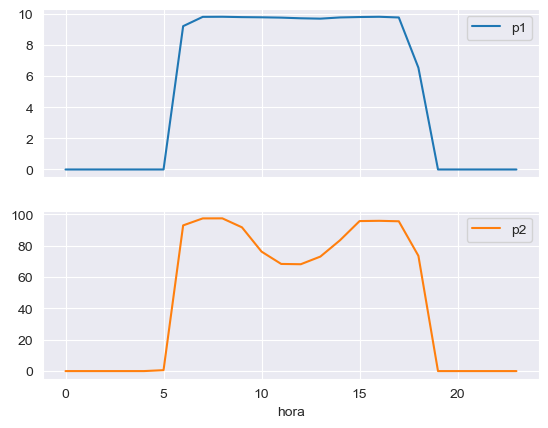

In [125]:
temp.unstack(level = 0).plot(subplots = True, layout = (2,1), sharex=True);

**INSIGHT #3**

La planta 1 tiene una capacidad de transformar DC a AC constante pero bajísima, lo cual sugiere problemas con los inverters.

Otras conclusiones:

* Entrar en el detalle de los inverters de la planta 1, a ver si son todos o hay algunos que sesgan la media
* Revisar por qué la planta 2 pierde eficiencia durante las horas de más irradiación

Vamos a analizar por que la **Planta 2** pierde eficiencia en las hroas de mayor irradiacion

In [126]:
# me quedo solamente con algunas variables y lo paso a transaccional
temp = df[['planta','hora','kw_dc','kw_ac']].melt(id_vars= ['planta','hora'])
temp

planta  hora variable           value
0          p1     0    kw_dc            0.00
1          p1     0    kw_dc            0.00
2          p1     0    kw_dc            0.00
3          p1     0    kw_dc            0.00
4          p1     0    kw_dc            0.00
...       ...   ...      ...             ...
272939     p2    23    kw_ac            0.00
272940     p2    23    kw_ac            0.00
272941     p2    23    kw_ac            0.00
272942     p2    23    kw_ac            0.00
272943     p2    23    kw_ac            0.00

[272944 rows x 4 columns]

C:\Users\Poitou\AppData\Local\Temp\ipykernel_4828\3139505913.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = temp[temp.planta == 'p2'], x = 'hora', y = 'value', hue = 'variable', ci = False);


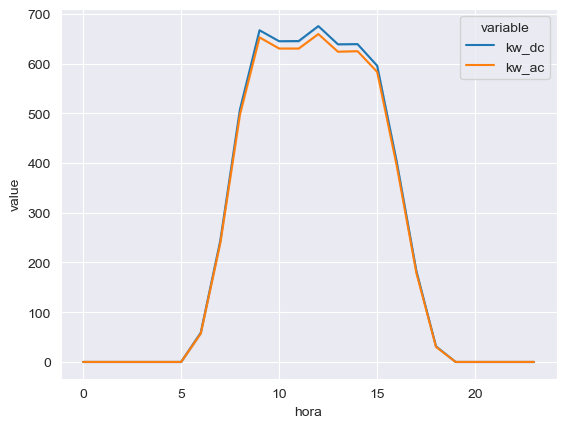

In [133]:
# ci = false para que no muestre los intervalos de confianza
sns.lineplot(data = temp[temp.planta == 'p2'], x = 'hora', y = 'value', hue = 'variable', ci = False);

Vemos que efectivamente en las horas centrales hay pérdida de eficiencia para la planta 2. Pero muy menor al nivel de pérdida que habíamos visto en el análisis anterior.

Vamos a analizar la distribución de la eficiencia haciendo un zoom en esas horas.

In [134]:
temp = df.between_time('08:00:00','15:00:00')
temp = temp[temp.planta == 'p2']

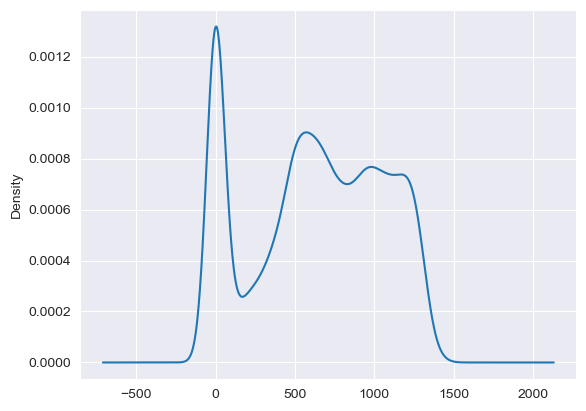

In [138]:
temp.kw_dc.plot.density();

Parece que no es problema de los inverters, si no que en las horas de mayor irradiacion no se ha generado DC.

Vamos a poner la condición de que DC > 0 y ver ahí cual es la eficiencia.

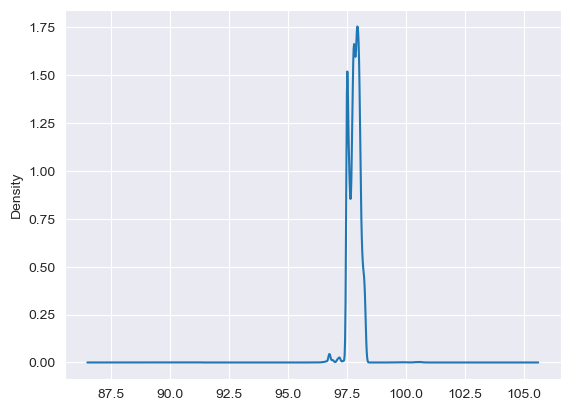

In [139]:
temp[temp.kw_dc > 0].eficiencia.plot.density();

Efectivamente cuando hay DC la eficiencia es superior al 96%.

La pregunta entonces es ¿por qué no hay DC? ¿Hay algún patrón?

Vamos a crear un indicador de DC = 0 para poder analizarlo.

In [140]:
temp['kw_dc_cero'] = np.where(temp['kw_dc'] == 0, 1, 0)
temp

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
2020-05-15 08:00:00     p2    5   15     8       0  iq8k7ZNt4Mwm3w0   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   
2020-06-17 15:00:00     p2    6   17    15       0  iq8k7ZNt4Mwm3w0   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
2020-05-15 08:00:00            0.46           27.68           35.71   
...                             ...             ...             ...   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   
2020-06-17 15:00:00            0.36           27.23           29.35   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 08:00:00  4UPUqMRk7TRMgml          581.05          569.41   
2020-05-15 08:00:00  81aHJ1q11NBPMrL          534.67          524.09   
2020-05-15 08:00:00  9kRcWv60rDACzjR          568.53          557.16   
2020-05-15 08:00:00  Et9kgGMDl729KT4          526.24          515.83   
2020-05-15 08:00:00  IQ2d7wF4YD8zU1Q          578.17          566.58   
...                              ...             ...             ...   
2020-06-17 15:00:00  q49J1IKaHRwDQnt          562.34          551.13   
2020-06-17 15:00:00  rrq4fwE8jgrTyWY          534.27          523.71   
2020-06-17 15:00:00  vOuJvMaM2sgwLmb          578.85          567.15   
2020-06-17 15:00:00  xMbIugepa2P7lBB          568.86          557.49   
2020-06-17 15:00:00  xoJJ8DcxJEcupym          578.49          566.90   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 08:00:00           98.00          554.00      2429565.00   
2020-05-15 08:00:00           98.02          516.60   1215279252.60   
2020-05-15 08:00:00           98.00          551.80   2247720128.80   
2020-05-15 08:00:00           98.02          503.00      1704753.00   
2020-05-15 08:00:00           97.99          552.79     19942078.79   
...                             ...             ...             ...   
2020-06-17 15:00:00           98.01         3380.87       519981.87   
2020-06-17 15:00:00           98.02         3190.40    121130615.40   
2020-06-17 15:00:00           97.98         3534.07      2426903.07   
2020-06-17 15:00:00           98.00         3433.50    106895609.50   
2020-06-17 15:00:00           98.00         3534.67    209334959.67   

                           date  kw_dc_cero  
fecha                                        
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15    

Vamos a analizar las variables numericas respecto a esta nueva variable categorica que creamos o flag

In [145]:
temp.groupby('kw_dc_cero')[['irradiacion', 't_ambiente', 't_modulo']].mean()

irradiacion      t_ambiente        t_modulo
kw_dc_cero                                                
0                     0.59           30.48           44.32
1                     0.80           32.48           52.03

En la temperatura ambiente no hay mucha diferencia, pero en la del módulo y en la irradiación sí.

¿Podría ser que si se calienta demasiado el módulo deje de generar DC?

Vamos a verlo comparando la temperatura del módulo con la generación de DC.

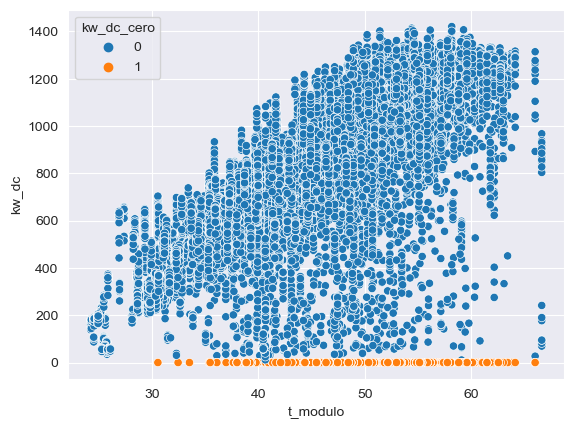

In [147]:
sns.scatterplot(data = temp, x = 't_modulo', y = 'kw_dc', hue = 'kw_dc_cero');

La hipótesis anterior no se confirma, ya que hay muchos casos de temperaturas altas del modulo donde se genera DC, y también de kw_dc igual a cero en casi todos los rangos de temperaturas, no necesariamente en las temperaturas mas altas.

Vamos a analizar ahora las categóricas, empezando por el inverter.

Como la nueva variable kw_dc_cero es un flag 0 y 1, haciendo una media de los valores de este flag, voy a sacar el porcentaje de los que tienen kw_dc = 0.

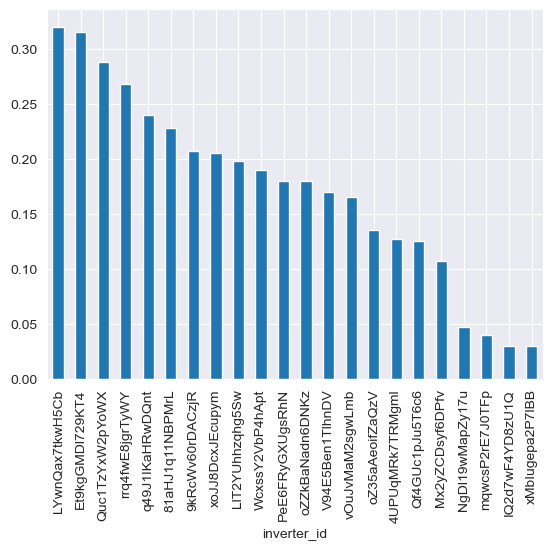

In [157]:
temp.groupby('inverter_id').kw_dc_cero.mean().sort_values(ascending = False).plot.bar();

Existe gran diferencia en el porcentaje de producción cero de DC por inverter.

Desde algunos que tienen menos del 5% hasta algunos que superan el 30%.

**INSIGHT #4:**: En la planta 2 existen varios inverters a los que no está llegando suficiente producción de DC, y por tanto los módulos respectivos necesitan revisión (a priori no es una falla del inverter).

Vamos a confirmar que los inverters no sean el problema. Para eso vamos a analizar los inverters desde el punto de vista de la eficiencia media para ver si hay "buenos y malos", para los casos donde kw_dc > 0 (para ver si cuando no tenemos un problema en los modulos, los inverters funcionan bien).

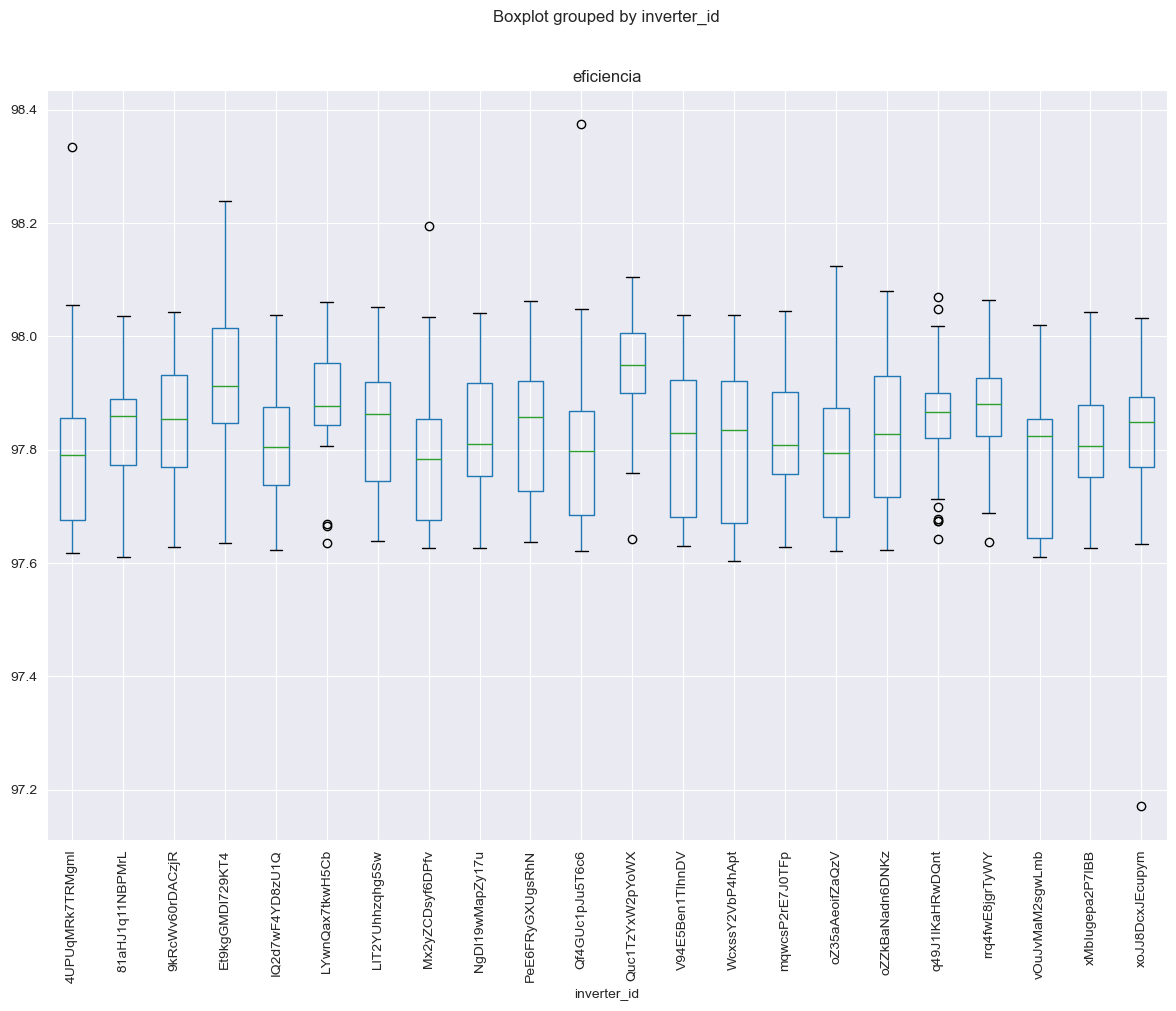

In [166]:
temp[temp.kw_dc > 0].groupby(['inverter_id', 'date'], as_index = False).eficiencia.mean().boxplot(column = 'eficiencia', by = 'inverter_id', figsize = (14,10))
plt.xticks(rotation = 90);

**INSIGHT #5:**: Una vez descontando el problema de la no generación de DC, los inverters de la planta 2 sí funcionan bien y hacen bien el trabajo de transformación a AC, con una eficiencia entre 97% y 98%.

Para terminar de analizar la eficiencia de los inverters podemos ver su rendimiento en cada uno de los días para ver si han podido existir problemas puntuales.

In [172]:
temp.inverter_id.nunique()

22

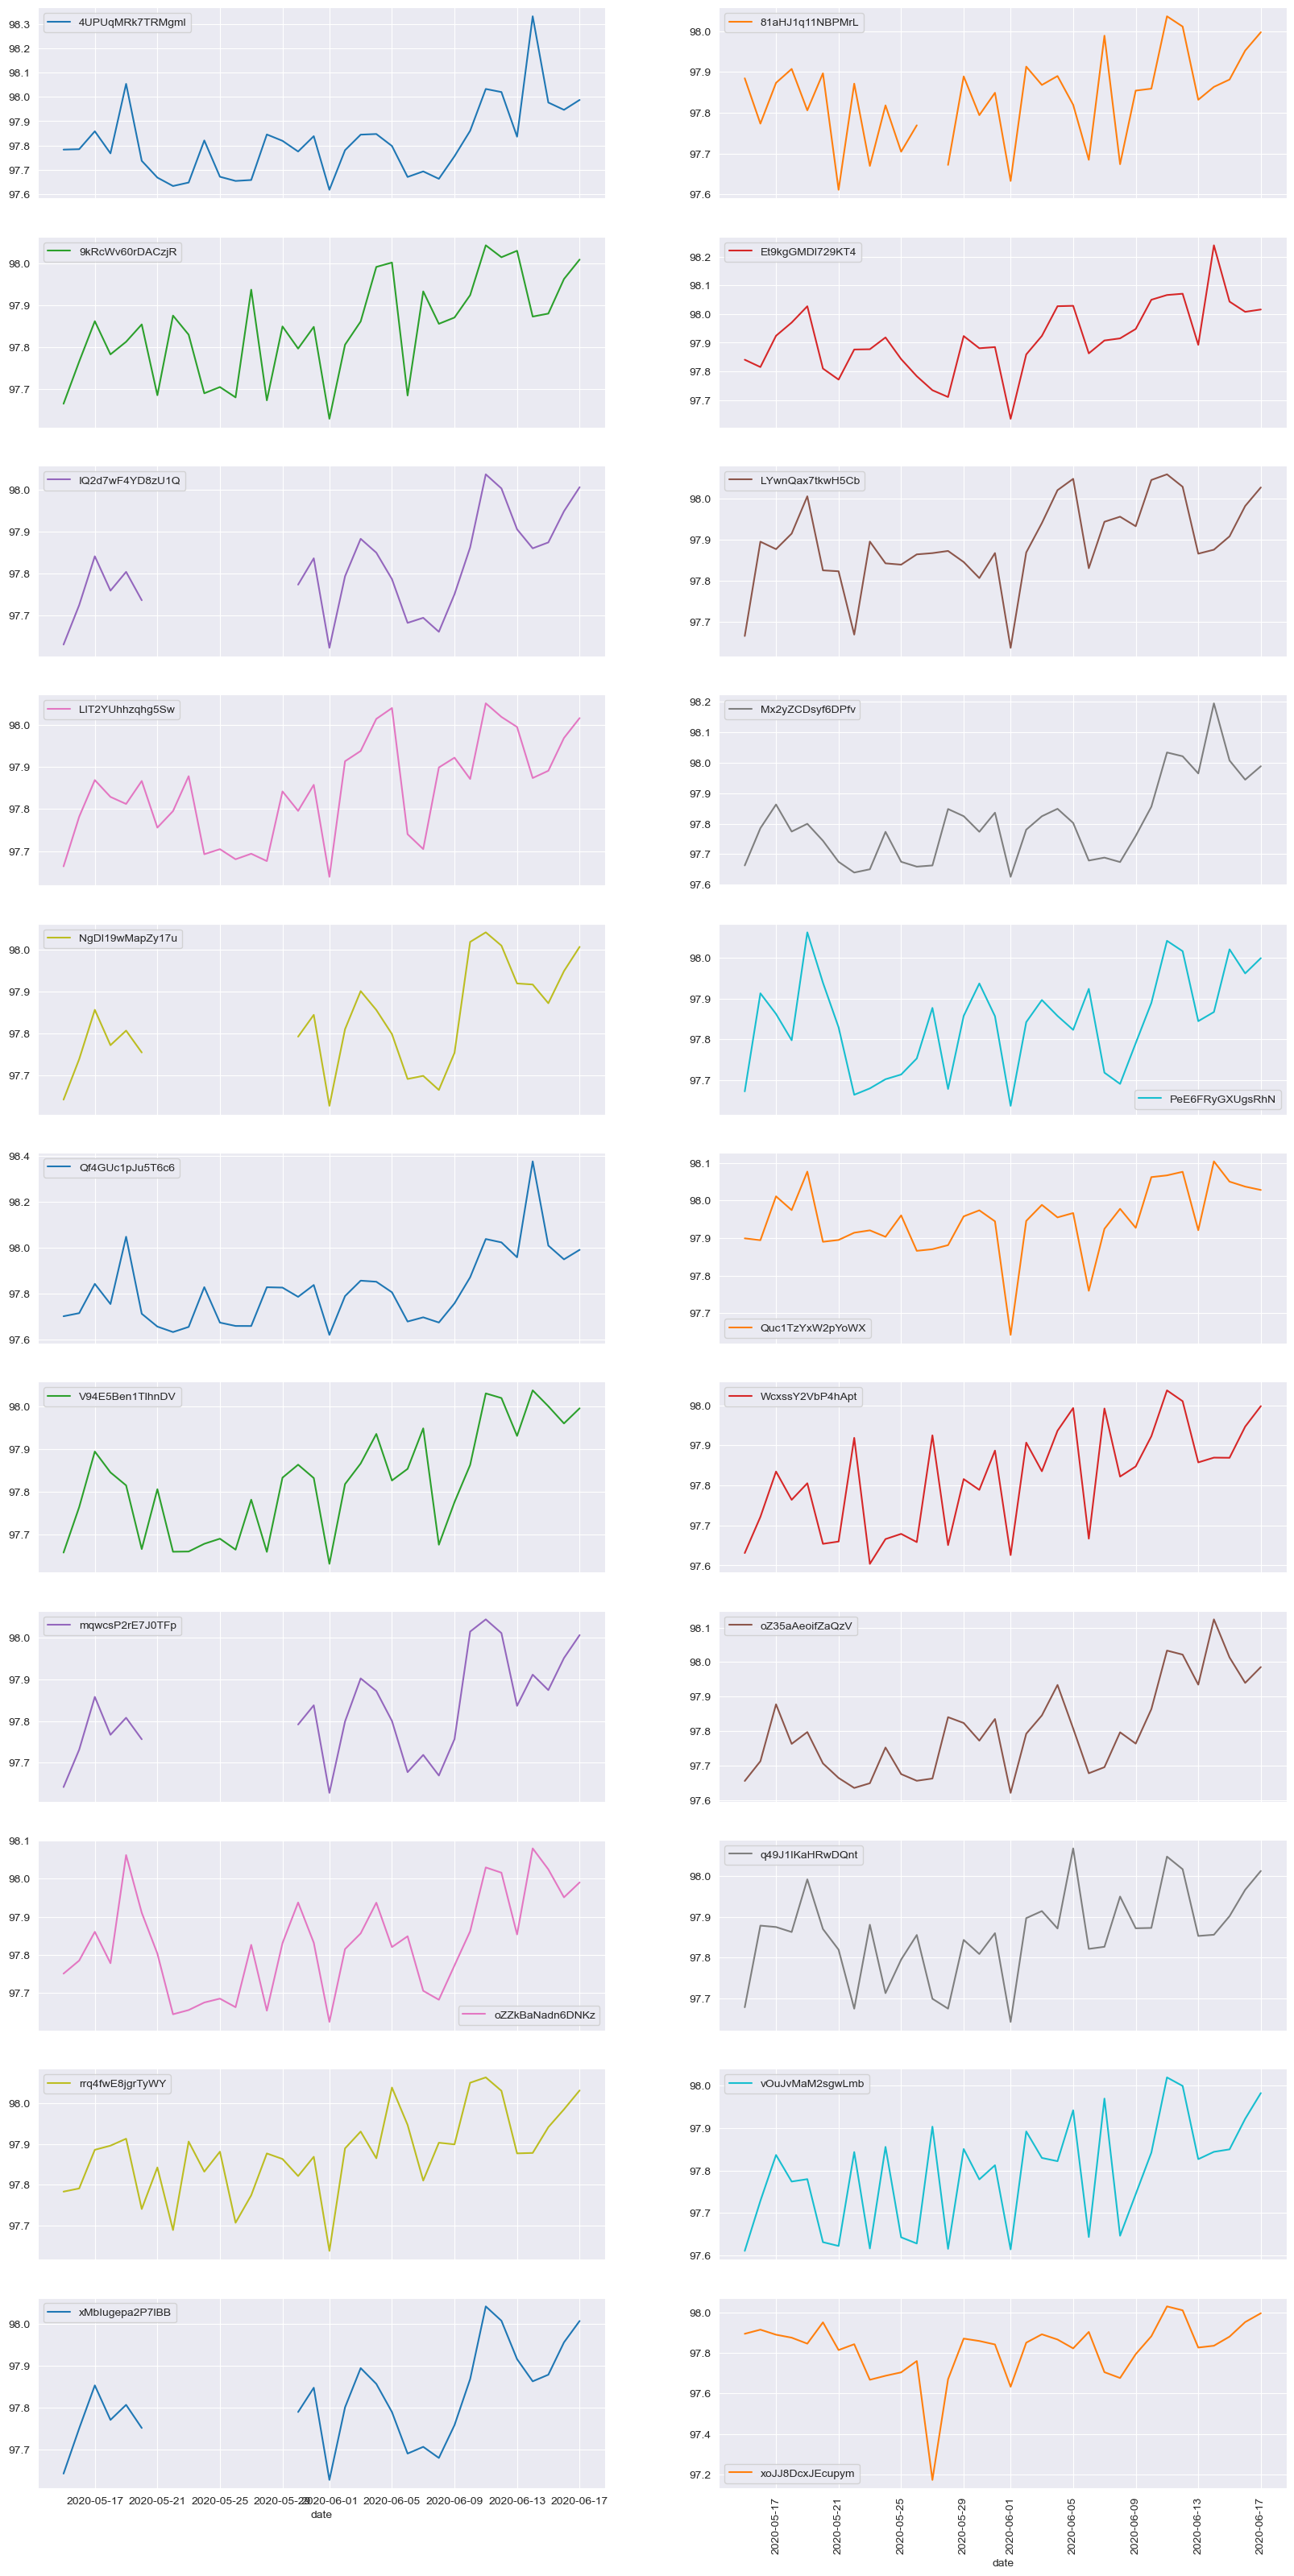

In [180]:
temp[temp.kw_dc > 0].groupby(['inverter_id', 'date']).eficiencia.mean().unstack(level=0).\
    plot(subplots = True, sharex = True, layout = (11, 2), figsize = (20,40))
plt.xticks(rotation = 90);

Para algunos inverters, hay un horario donde no hay datos de eficiencia.

Vamos a analizar ahora el comportamiento de la **Planta 1** en las horas de mayor irradiacion

In [181]:
temp = df.between_time('08:00:00','15:00:00')
temp = temp[temp.planta == 'p1']
temp['kw_dc_cero'] = np.where(temp['kw_dc'] == 0, 1, 0)
temp

planta  mes  dia  hora  minuto        sensor_id  \
fecha                                                                 
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
2020-05-15 08:00:00     p1    5   15     8       0  HmiyD2TTLFNqkNe   
...                    ...  ...  ...   ...     ...              ...   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   
2020-06-17 15:00:00     p1    6   17    15       0  HmiyD2TTLFNqkNe   

                        irradiacion      t_ambiente        t_modulo  \
fecha                                                                 
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
2020-05-15 08:00:00            0.20           25.42           31.41   
...                             ...             ...             ...   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   
2020-06-17 15:00:00            0.32           28.62           39.95   

                         inverter_id           kw_dc           kw_ac  \
fecha                                                                  
2020-05-15 08:00:00  1BY6WEcLGh8j5v7         3246.00          318.67   
2020-05-15 08:00:00  1IF53ai7Xc0U56Y         2805.62          275.46   
2020-05-15 08:00:00  3PZuoBAID5Wc2HD         2736.12          268.62   
2020-05-15 08:00:00  7JYdWkrLSPkdwr4         2741.50          269.15   
2020-05-15 08:00:00  McdE0feGgRqW7Ca         3208.88          315.05   
...                              ...             ...             ...   
2020-06-17 15:00:00  uHbuxQJl8lW7ozc         4719.62          462.89   
2020-06-17 15:00:00  wCURE6d3bPkepu2         5077.75          497.80   
2020-06-17 15:00:00  z9Y9gH1T5YWrNuG         5113.00          501.29   
2020-06-17 15:00:00  zBIq5rxdHJRwDNY         4675.38          458.61   
2020-06-17 15:00:00  zVJPv84UY57bAof         4853.75          475.96   

                         eficiencia          kw_dia        kw_total  \
fecha                                                                 
2020-05-15 08:00:00            9.82          263.57      6259822.57   
2020-05-15 08:00:00            9.82          292.50      6183937.50   
2020-05-15 08:00:00            9.82          287.75      6988046.75   
2020-05-15 08:00:00            9.82          281.00      7603241.00   
2020-05-15 08:00:00            9.82          291.00      7159255.00   
...                             ...             ...             ...   
2020-06-17 15:00:00            9.81         5423.50      7286458.50   
2020-06-17 15:00:00            9.80         5343.75      7028061.75   
2020-06-17 15:00:00            9.80         5282.88      7250667.88   
2020-06-17 15:00:00            9.81         5284.75      6582836.75   
2020-06-17 15:00:00            9.81         5368.75      7362730.75   

                           date  kw_dc_cero  
fecha                                        
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15           0  
2020-05-15 08:00:00  2020-05-15    

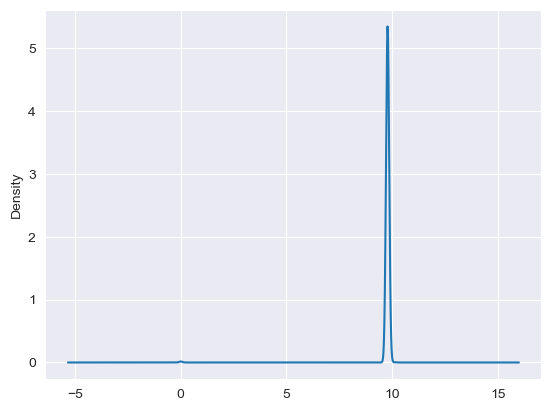

In [182]:
temp.eficiencia.plot.density();

A diferencia de las planta 2, en la planta 1 todos los inverters tienen una eficiencia constante, aunque muy baja (en el entorno de un 9%)

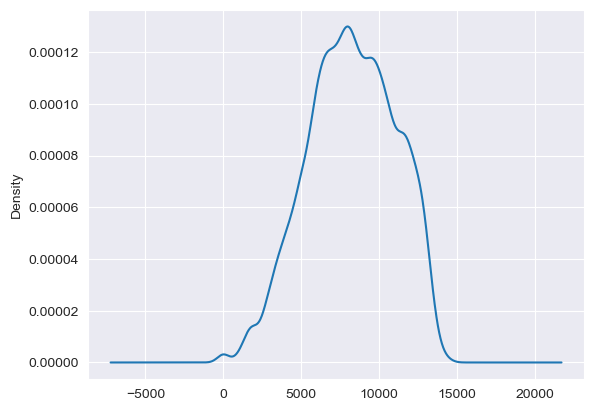

In [183]:
temp.kw_dc.plot.density();

Aqui el problema no es el kw_dc = 0 para las horas de mayor irradiacion y por tanto no tendremos es sesgo en los datos.

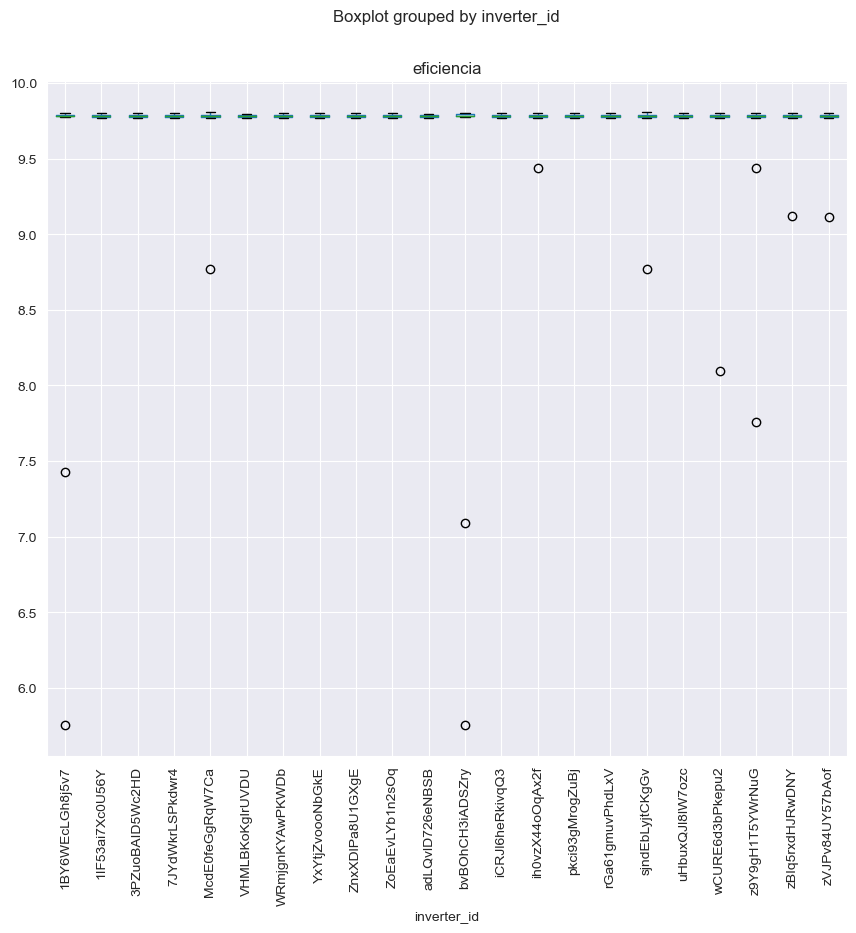

In [185]:
temp.groupby(['inverter_id','date'],as_index = False).eficiencia.mean().boxplot(column = 'eficiencia', by = 'inverter_id', figsize = (10,9))
plt.xticks(rotation = 90);

Vemos que salvo días puntuales en algunos inverters en el resto la eficiencia es constante.

Vamos a revisar la eficiencia media diaria por cada inverter.

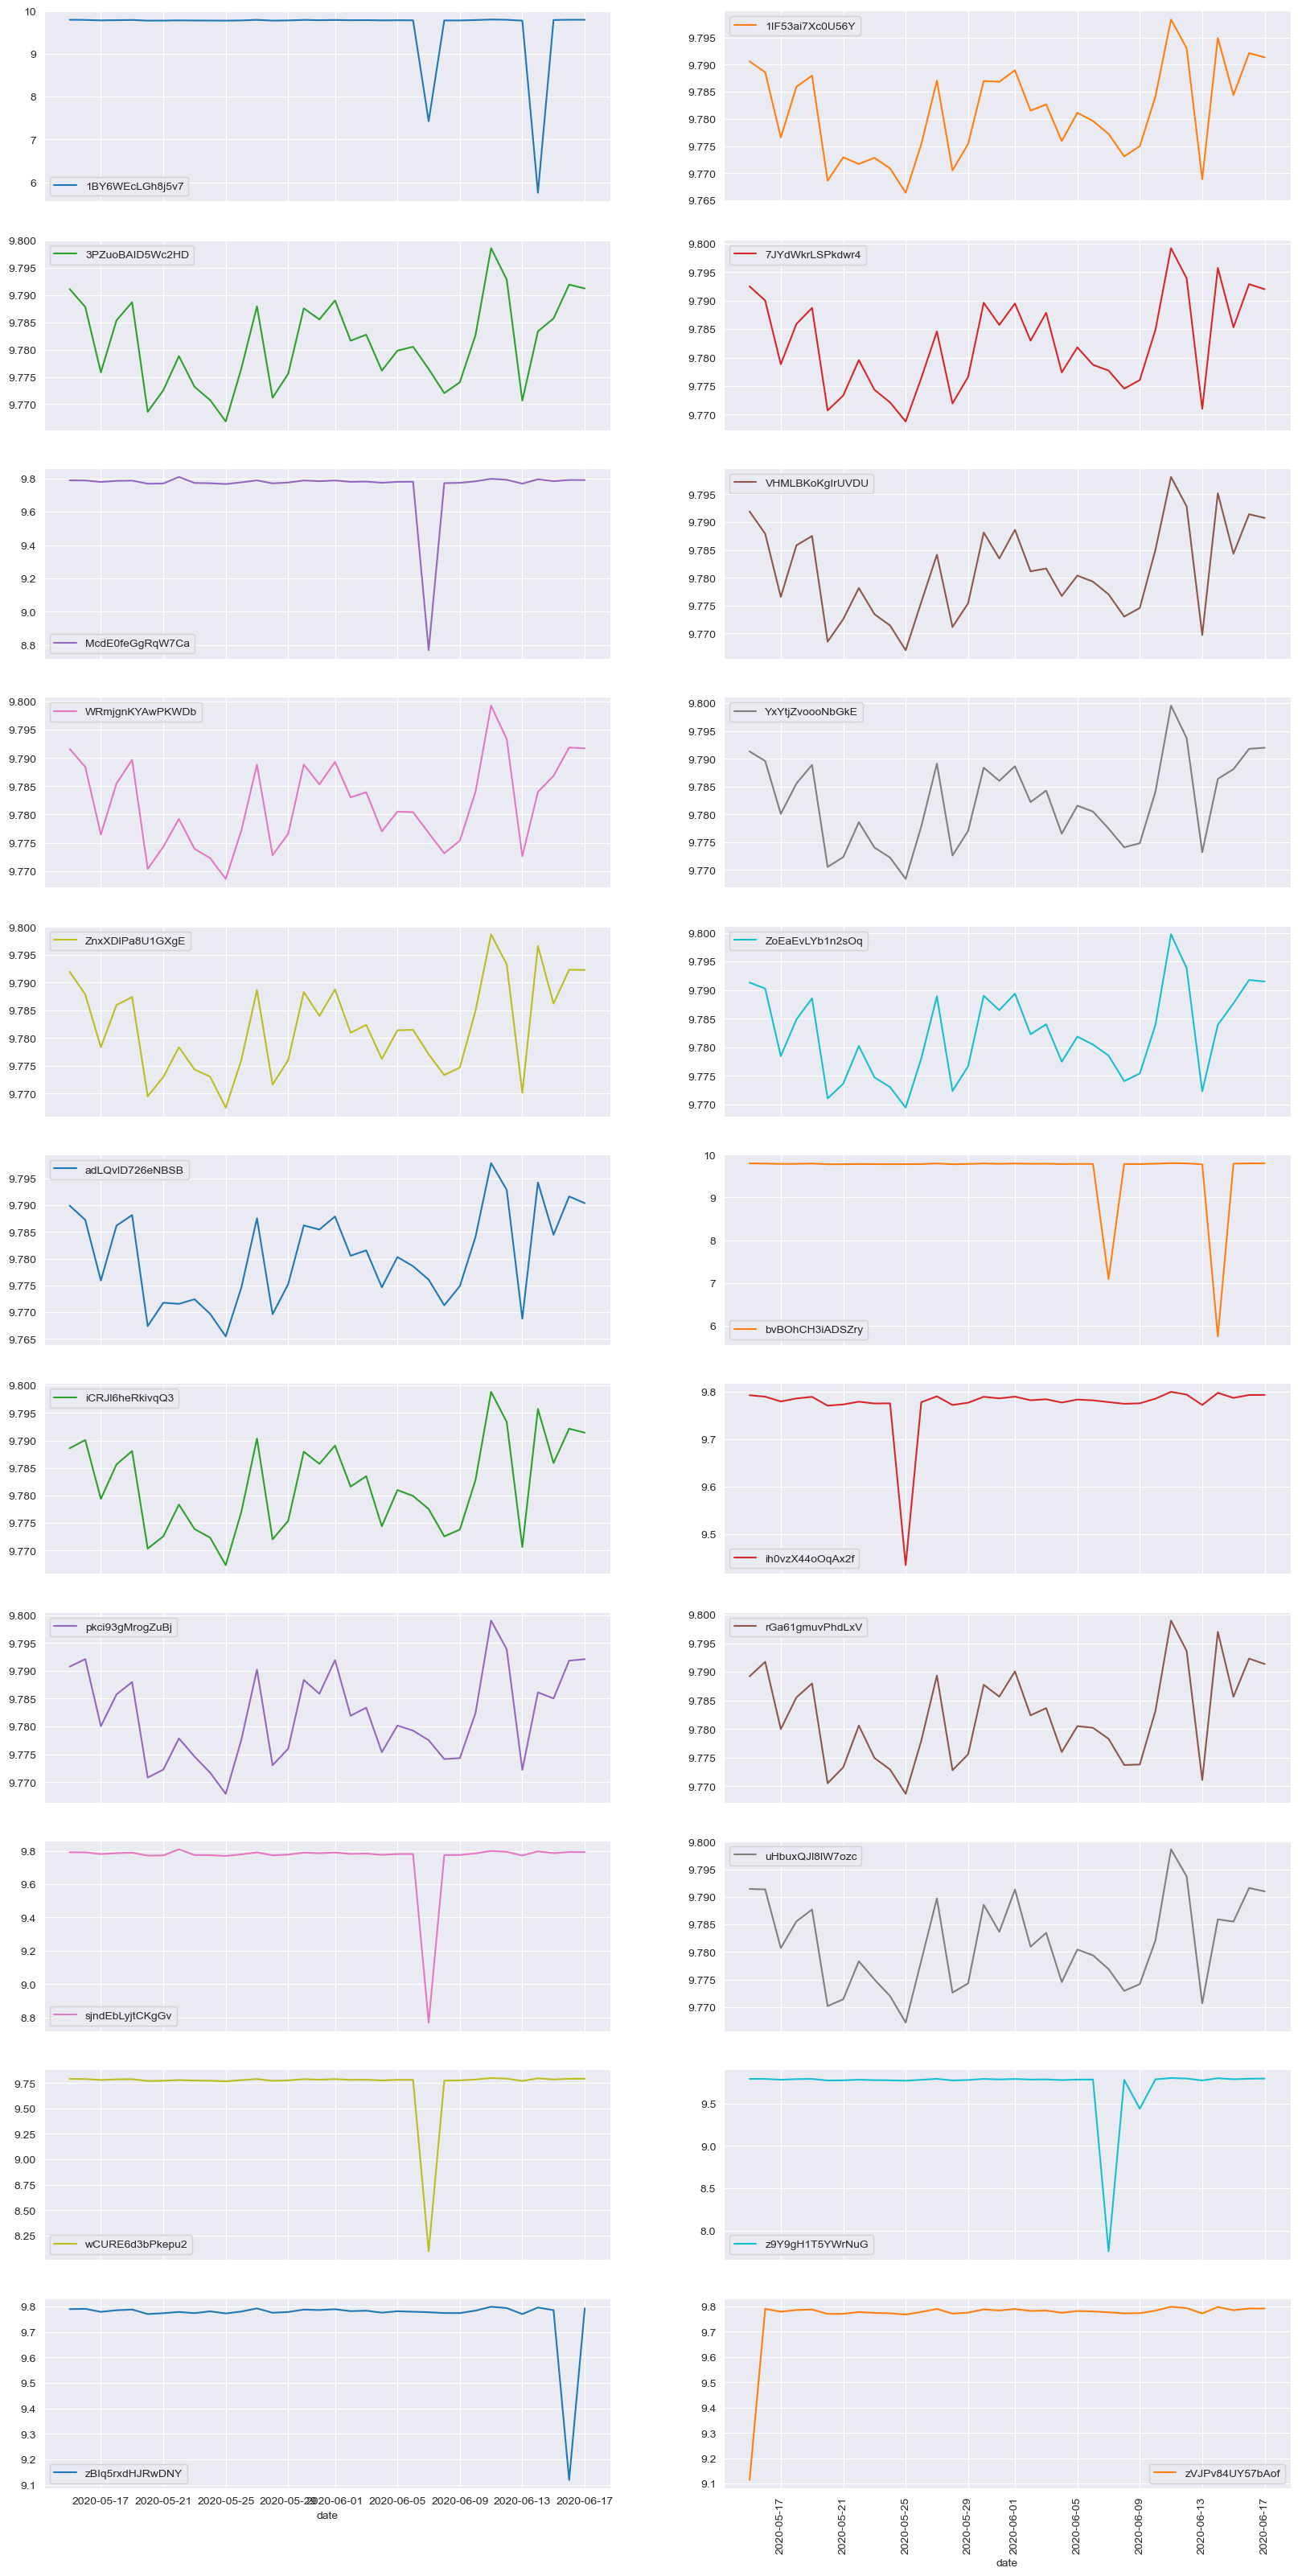

In [187]:
temp.groupby(['inverter_id', 'date']).eficiencia.mean().unstack(level=0).\
    plot(subplots = True, sharex = True, layout = (11, 2), figsize = (20,40))
plt.xticks(rotation = 90);

En el análisis por inverter vemos de nuevo que todos los datos son aproximadamente constantes, sufriendo alguno de ellos ciertas variaciones pequenas en algun dia puntual.

Vamos a comprobar que entonces no hay fallos en la generación de DC.

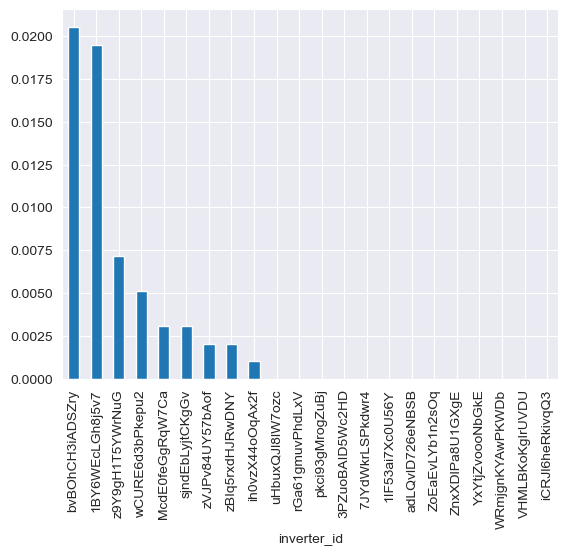

In [188]:
temp.groupby('inverter_id').kw_dc_cero.mean().sort_values(ascending = False).plot.bar();

Vemos que aunque hay algunos inverters que han tenido fallos su magnitud es inferior al 2% de las mediciones.

Por tanto la generación de DC en la planta 1 sí es correcta, y el fallo está en la transformación de DC a AC.

# CONCLUSIONES

Tras un ananálisis de los datos podemos concluir que:
    
* Existen graves problemas de calidad de datos. Se debería revisar en qué parte de la cadena se generan estos problemas, incluyendo los medidores de las plantas.
* El hecho de que la generación en DC sea unas 10 veces superior en la planta 1 que en la 2, sumado al hecho de que la eficiencia en la planta 1 esté cerca del 10%, nos lleva a pensar que el dato de generación de DC en la planta 1 puede estar artificialmente escalado por algún motivo.
* La dos plantas han recibido altas cantidades de irradiación, no hemos localizado ningún problema en esta fase
* Aunque la temperatura ambiente es superior en la planta 2 y sus módulos se calientan más que los de la planta 1, pero esto no parece tener un impacto significativo
* La generación de DC de la planta 1 funciona bien, los módulos parecen llevar DC a los inverters.
* La generación de DC de la planta 2 NO funciona bien, algunos módulos llevan muy poco DC a los inverters incluso en las horas de mayor irradiación.
* La conversion DC a AC de los inverters de la planta 1 NO funciona bien, solo se transforma en torno al 10%, eso sí, de forma constante. Y esta baja eficiencia no es debida a momentos de no recepción de DC ni se concentra en inverters concretos, si no que parece más estructural (de nuevo tener en cuenta que podría deberse a un problema de calidad de datos en kw_dc de la planta 1
* La transformación de DC a AC de la planta 2 funciona bien, ya que una vez eliminados los períodos de generación cero de DC, el resto tienen una eficiencia superior al 97%

Recomendaciones:

* Revisar la captación de datos y su fiabilidad
* Revisión de mantenimiento en los módulos de los inverters de la planta 2 en los que hay muchos momentos de generación cero de DC
* Revisión de mantenimiento de los inverters de la Planta 1, dada su baja eficiencia